In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px
import plotly.graph_objects as go


#Exploring the Dataset


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Here_It_Gegins/CO2 Emissions_Canada.csv')

# Explore the data
df.head()


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.shape

(7385, 12)

In [ ]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [ ]:
new_column_names = ['Make', 'Model', 'Vehicle Class', 'Engine Size (L)', 'Cylinders',
                    'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
                    'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
                    'Fuel Consumption Comb (mpg)', 'CO2 Emissions (g/km)']

df.columns = new_column_names


In [ ]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size (L)                     0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions (g/km)                0
dtype: int64

In [ ]:

data_types = df.dtypes
print(data_types)


Make                                 object
Model                                object
Vehicle Class                        object
Engine Size (L)                     float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions (g/km)                  int64
dtype: object


In [ ]:
df.describe()

,Engine Size (L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions (g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [ ]:
#knowing more about the datasets
#checking about the unique value and their counts in the categorical columns






# Count unique values in 'Transmission'
transmission_counts = df['Transmission'].nunique()
print(f"Unique Transmissions: {transmission_counts}")

# Count unique values in 'Fuel Type'
fuel_type_counts = df['Fuel Type'].nunique()
print(f"Unique Fuel Types: {fuel_type_counts}")


Unique Transmissions: 27
Unique Fuel Types: 5


In [ ]:
# List of columns to get unique values from
columns_to_check = ['Transmission', 'Fuel Type']

for column in columns_to_check:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    for value in unique_values:
        print(value)
    print('\n')


Unique values in 'Transmission':
AS5
M6
AV7
AS6
AM6
A6
AM7
AV8
AS8
A7
A8
M7
A4
M5
AV
A5
AS7
A9
AS9
AV6
AS4
AM5
AM8
AM9
AS10
A10
AV10


Unique values in 'Fuel Type':
Z
D
X
E
N




In [ ]:
df1=df.copy(deep=True)

In [ ]:
#we can see thier are unique models of the class

category_map = {'A10' : 'A',
                'A4' : 'A',
                'A5': 'A',
                'A6': 'A',
                'A7': 'A',
                'A8': 'A',
                'A9': 'A',
                'AM5':'AM',
                'AM6':'AM',
                'AM7':'AM',
                'AM8':'AM',
                'AM9':'AM',
                'AS10':'AS',
                'AS4':'AS',
                'AS5':'AS',
                'AS6':'AS',
                'AS7':'AS',
                'AS8':'AS',
                'AS9':'AS',
                'AV' :'AV',
                'AV10':'AV',
                'AV6':'AV',
                'AV7':'AV',
                'AV8':'AV',
                'M5':'M',
                'M6':'M',
                'M7':'M'}
df1['Transmission'] = df1['Transmission'].replace(category_map)

In [ ]:
# Unique values in the 'Transmission' column of df1
unique_transmissions = df1['Transmission'].unique()
print("Unique values in 'Transmission' column:")
for transmission in unique_transmissions:
    print(transmission)


Unique values in 'Transmission' column:
AS
M
AV
AM
A


## Data Visualisation

###Co2 emissions study

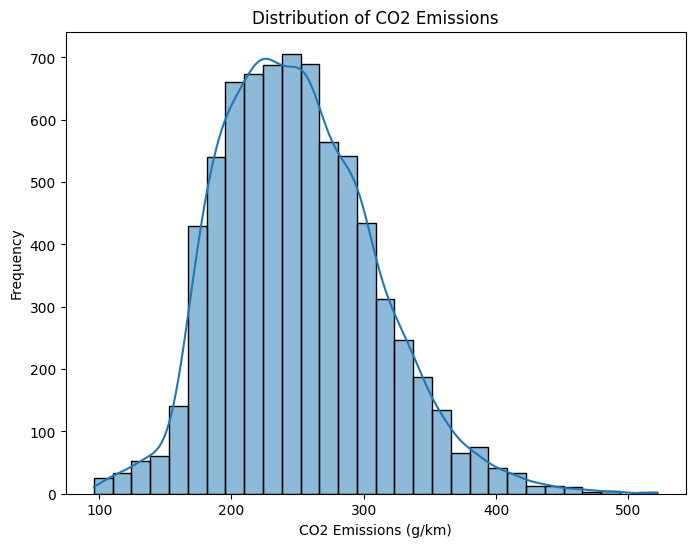

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df1['CO2 Emissions (g/km)'], bins=30, kde=True)
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Frequency')
plt.title('Distribution of CO2 Emissions')
plt.show()

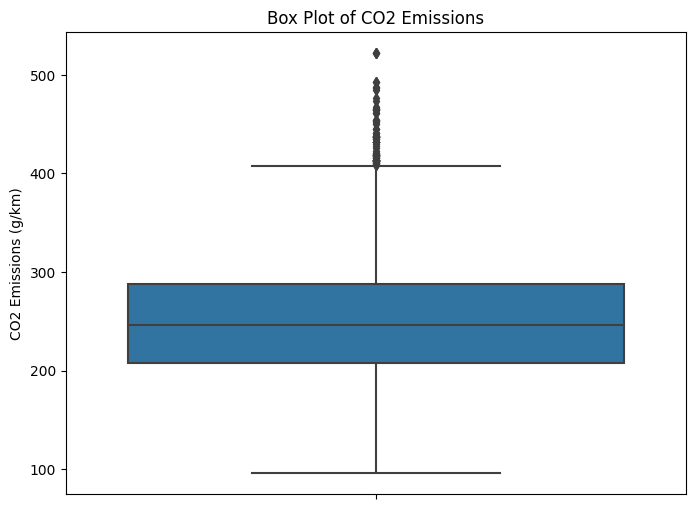

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, y='CO2 Emissions (g/km)')
plt.ylabel('CO2 Emissions (g/km)')
plt.title('Box Plot of CO2 Emissions')
plt.show()

#### Drawing the correlation matrix to gain more insights

<ipython-input-20-cedc7bdad3fa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


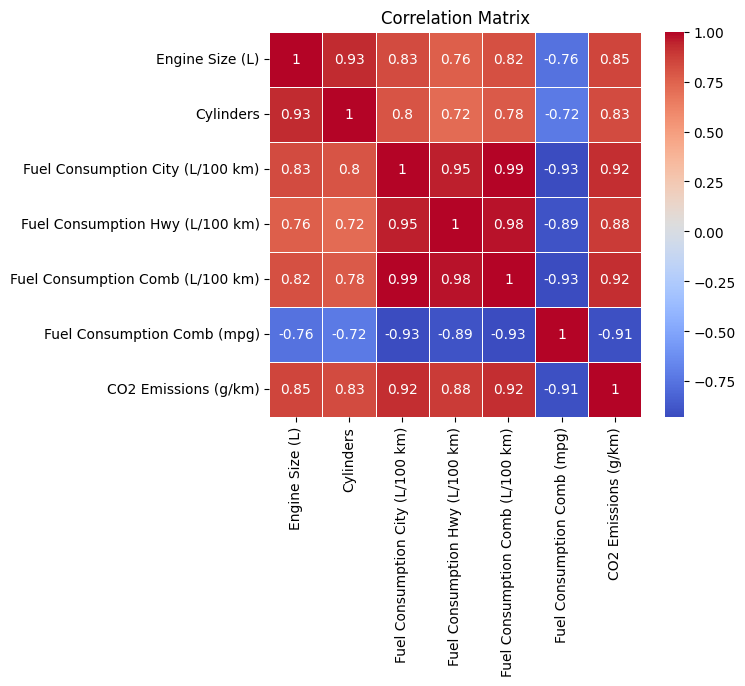

In [ ]:
correlation_matrix = df1.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
# finding the correlation between the regressor varaiable

In [ ]:
# one can see that there is collinearity between the engine size and no of cylinders used
# which is quite obvious so we would drop cylinders while finding a suitable model for our data


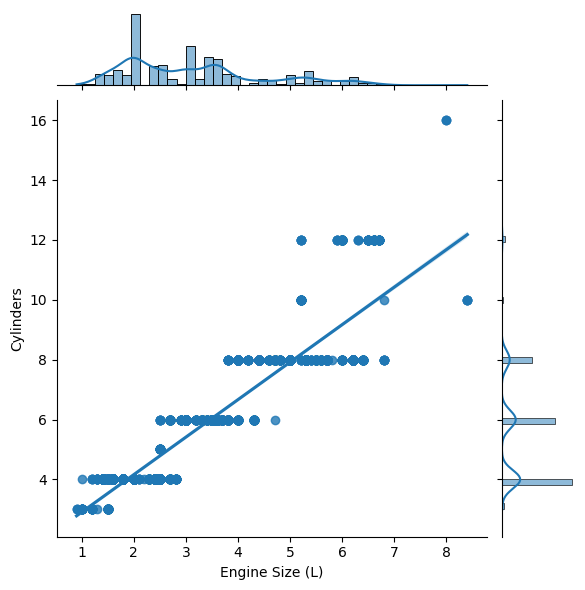

In [ ]:
sns.jointplot(data=df1, x='Engine Size (L)', y='Cylinders', kind='reg')
plt.show()

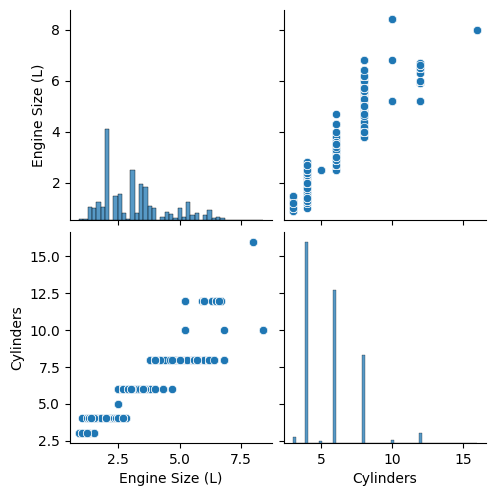

In [ ]:
sns.pairplot(df1[['Engine Size (L)', 'Cylinders']])
plt.show()

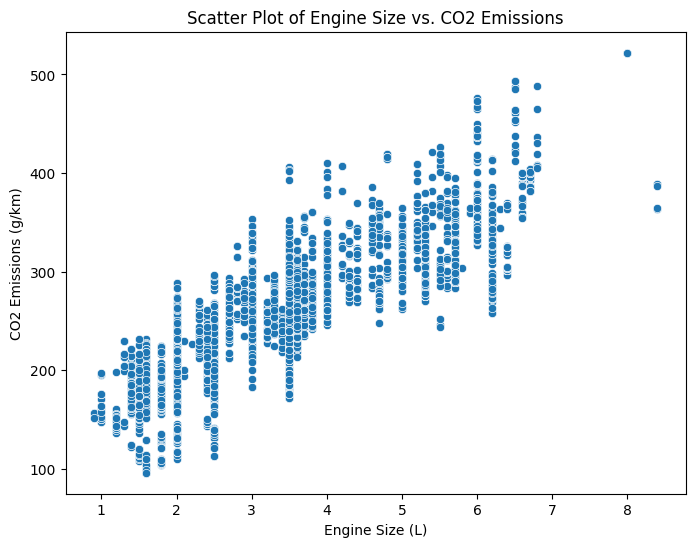

In [ ]:
#Scatter plot of Engine Size vs. CO2 Emissions
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x='Engine Size (L)', y='CO2 Emissions (g/km)')
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.title('Scatter Plot of Engine Size vs. CO2 Emissions')
plt.show()




In [ ]:
# we can observe as Engiine size increases the CO2 emissions increases.


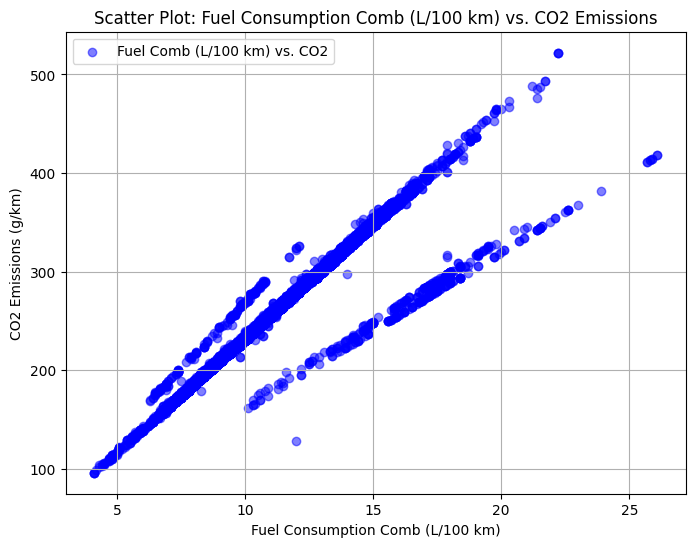

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(
    df1['Fuel Consumption Comb (L/100 km)'],
    df1['CO2 Emissions (g/km)'],
    alpha=0.5,  # Transparency of points
    c='blue',  # Color of points
    label='Fuel Comb (L/100 km) vs. CO2'  # Label for the legend
)

# Add labels and title
plt.xlabel('Fuel Consumption Comb (L/100 km)')
plt.ylabel('CO2 Emissions (g/km)')
plt.title('Scatter Plot: Fuel Consumption Comb (L/100 km) vs. CO2 Emissions')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
#we can infer as fuel comsumption increases the co2 emissions also incresases which istrue in general


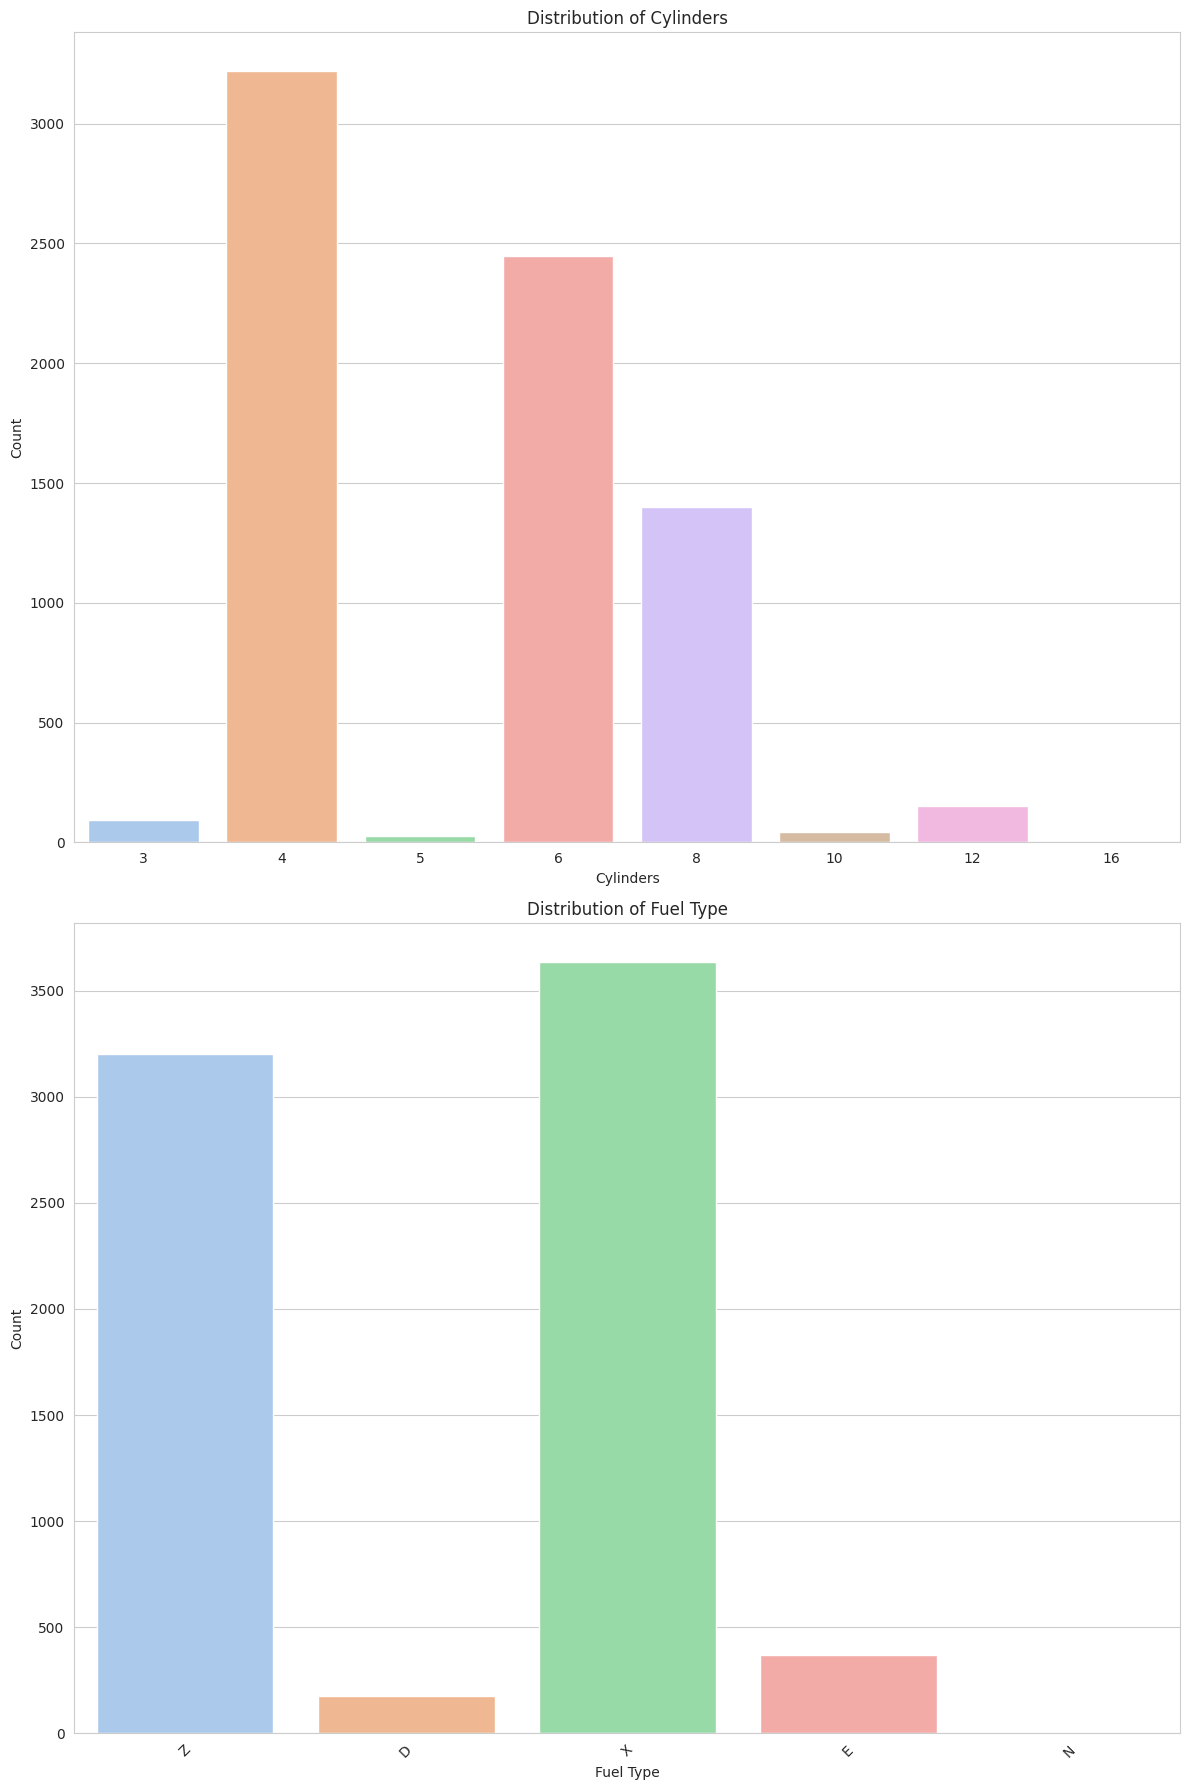

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and palette for better-looking visuals
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Create subplots for 'Cylinders,' 'Fuel Type,' and 'Make'
fig, axes = plt.subplots(2, 1, figsize=(12, 18))

# Bar plot for 'Cylinders'
sns.countplot(data=df1, x='Cylinders', ax=axes[0])
axes[0].set_xlabel('Cylinders')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Cylinders')

# Bar plot for 'Fuel Type'
sns.countplot(data=df1, x='Fuel Type', ax=axes[1])
axes[1].set_xlabel('Fuel Type')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Fuel Type')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability



# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
# Calculate the percentage of each value in the 'Cylinders' column
cylinders_percentage = (df1['Cylinders'].value_counts() / len(df1)) * 100

# Calculate the percentage of each value in the 'Fuel Type' column
fuel_type_percentage = (df1['Fuel Type'].value_counts() / len(df1)) * 100

# Display the results
print("Percentage of each value in 'Cylinders' column:")
print(cylinders_percentage)

print("\nPercentage of each value in 'Fuel Type' column:")
print(fuel_type_percentage)


Percentage of each value in 'Cylinders' column:
4     43.601896
6     33.121192
8     18.984428
12     2.044685
3      1.286391
10     0.568720
5      0.352065
16     0.040623
Name: Cylinders, dtype: float64

Percentage of each value in 'Fuel Type' column:
X    49.248477
Z    43.358158
E     5.010156
D     2.369668
N     0.013541
Name: Fuel Type, dtype: float64


In [ ]:
# we can infer from the graph that mostly 4 cylinders followed by 6 cylinders are used
# also fuel X is used in 49% and Z fuel is used 43%

In [ ]:
# Convert 'Cylinders' column to float
df1['Cylinders'] = df1['Cylinders'].astype(float)

# Convert 'Fuel Consumption Comb (mpg)' column to float
df1['Fuel Consumption Comb (mpg)'] = df1['Fuel Consumption Comb (mpg)'].astype(float)

# Convert 'CO2 Emissions (g/km)' column to float
df1['CO2 Emissions (g/km)'] = df1['CO2 Emissions (g/km)'].astype(float)


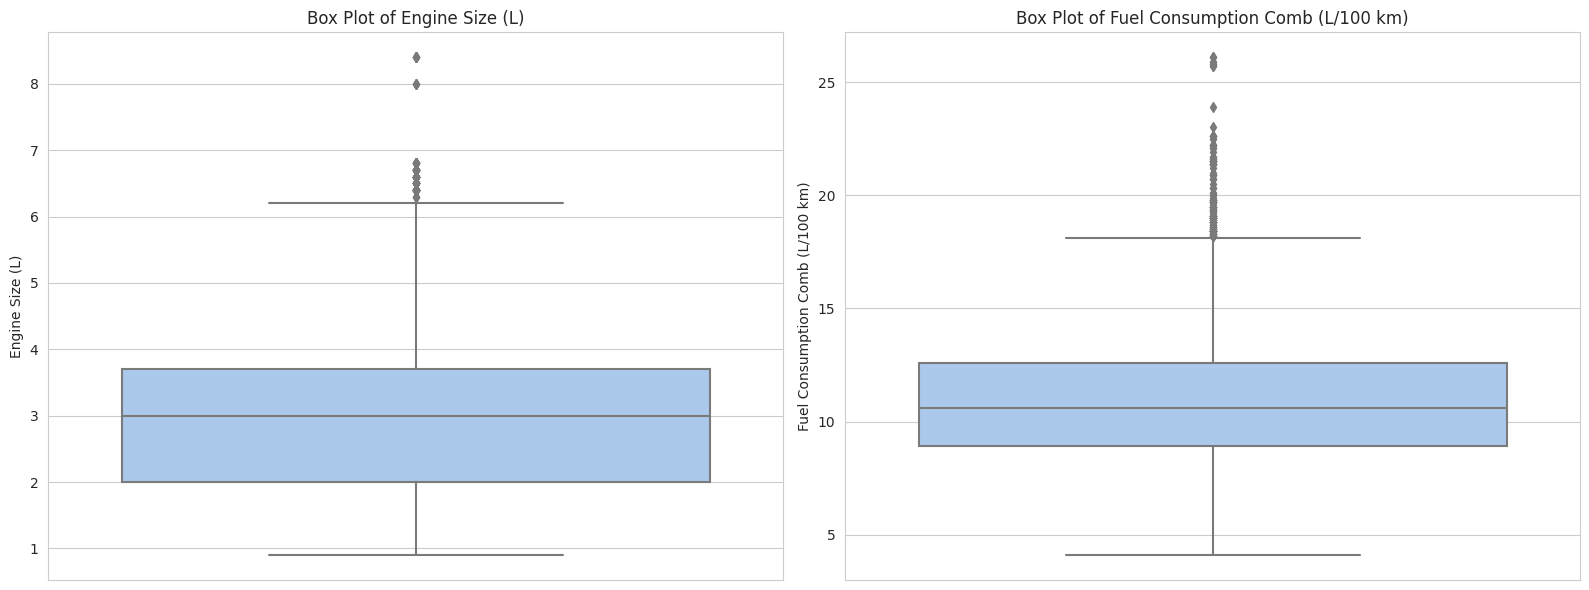

             Make               Model   Vehicle Class  Engine Size (L)  \
36           AUDI                 A8L       FULL-SIZE              6.3   
75        BENTLEY            MULSANNE        MID-SIZE              6.8   
180      CADILLAC        ESCALADE AWD  SUV - STANDARD              6.2   
182      CADILLAC    ESCALADE ESV AWD  SUV - STANDARD              6.2   
212     CHEVROLET  EXPRESS 1500 CARGO     VAN - CARGO              5.3   
...           ...                 ...             ...              ...   
7288  ROLLS-ROYCE               Ghost       FULL-SIZE              6.6   
7289  ROLLS-ROYCE           Ghost EWB       FULL-SIZE              6.6   
7290  ROLLS-ROYCE             Phantom       FULL-SIZE              6.7   
7291  ROLLS-ROYCE         Phantom EWB       FULL-SIZE              6.7   
7292  ROLLS-ROYCE              Wraith        MID-SIZE              6.6   

      Cylinders Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
36         12.0           AS       

In [ ]:


# Set a more visually pleasing style
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Create a 1x2 matrix of subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot for 'Engine Size'
sns.boxplot(data=df1, y='Engine Size (L)', ax=axes[0])
axes[0].set_ylabel('Engine Size (L)')
axes[0].set_title('Box Plot of Engine Size (L)')

# Box plot for 'Fuel Consumption Comb (L/100 km)'
sns.boxplot(data=df1, y='Fuel Consumption Comb (L/100 km)', ax=axes[1])
axes[1].set_ylabel('Fuel Consumption Comb (L/100 km)')
axes[1].set_title('Box Plot of Fuel Consumption Comb (L/100 km)')

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()




# Define a function to identify outliers using the interquartile range method
def find_outliers(data):
  # Calculate the first and third quartiles
  Q1 = np.percentile(data, 25)
  Q3 = np.percentile(data, 75)
  # Calculate the interquartile range
  IQR = Q3 - Q1
  # Define the lower and upper bounds for outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  # Return a boolean array indicating which values are outliers
  return (data < lower_bound) | (data > upper_bound)

# Apply the function to the columns of interest and create a new column for outliers
df1["Outliers"] = find_outliers(df1["Engine Size (L)"]) | find_outliers(df1["Fuel Consumption Comb (L/100 km)"])

# Filter the dataframe to keep only the rows with outliers
df_outliers = df1[df1["Outliers"] == True]

# Display the dataframe with outliers
print(df_outliers)



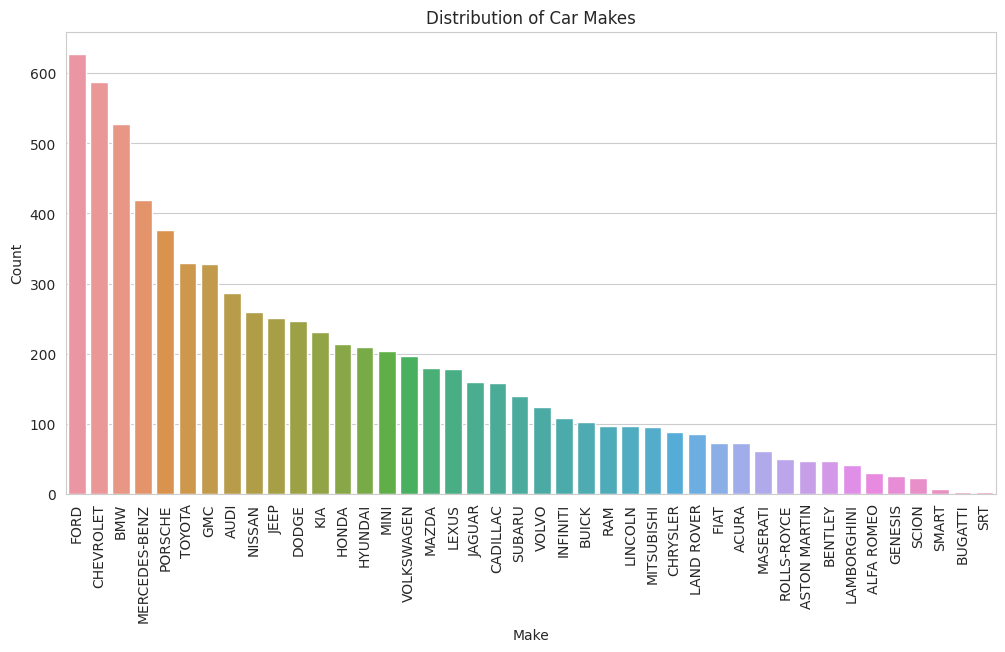

In [ ]:
# Distribution of Cars
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='Make', order=df1['Make'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Distribution of Car Makes')
plt.show()


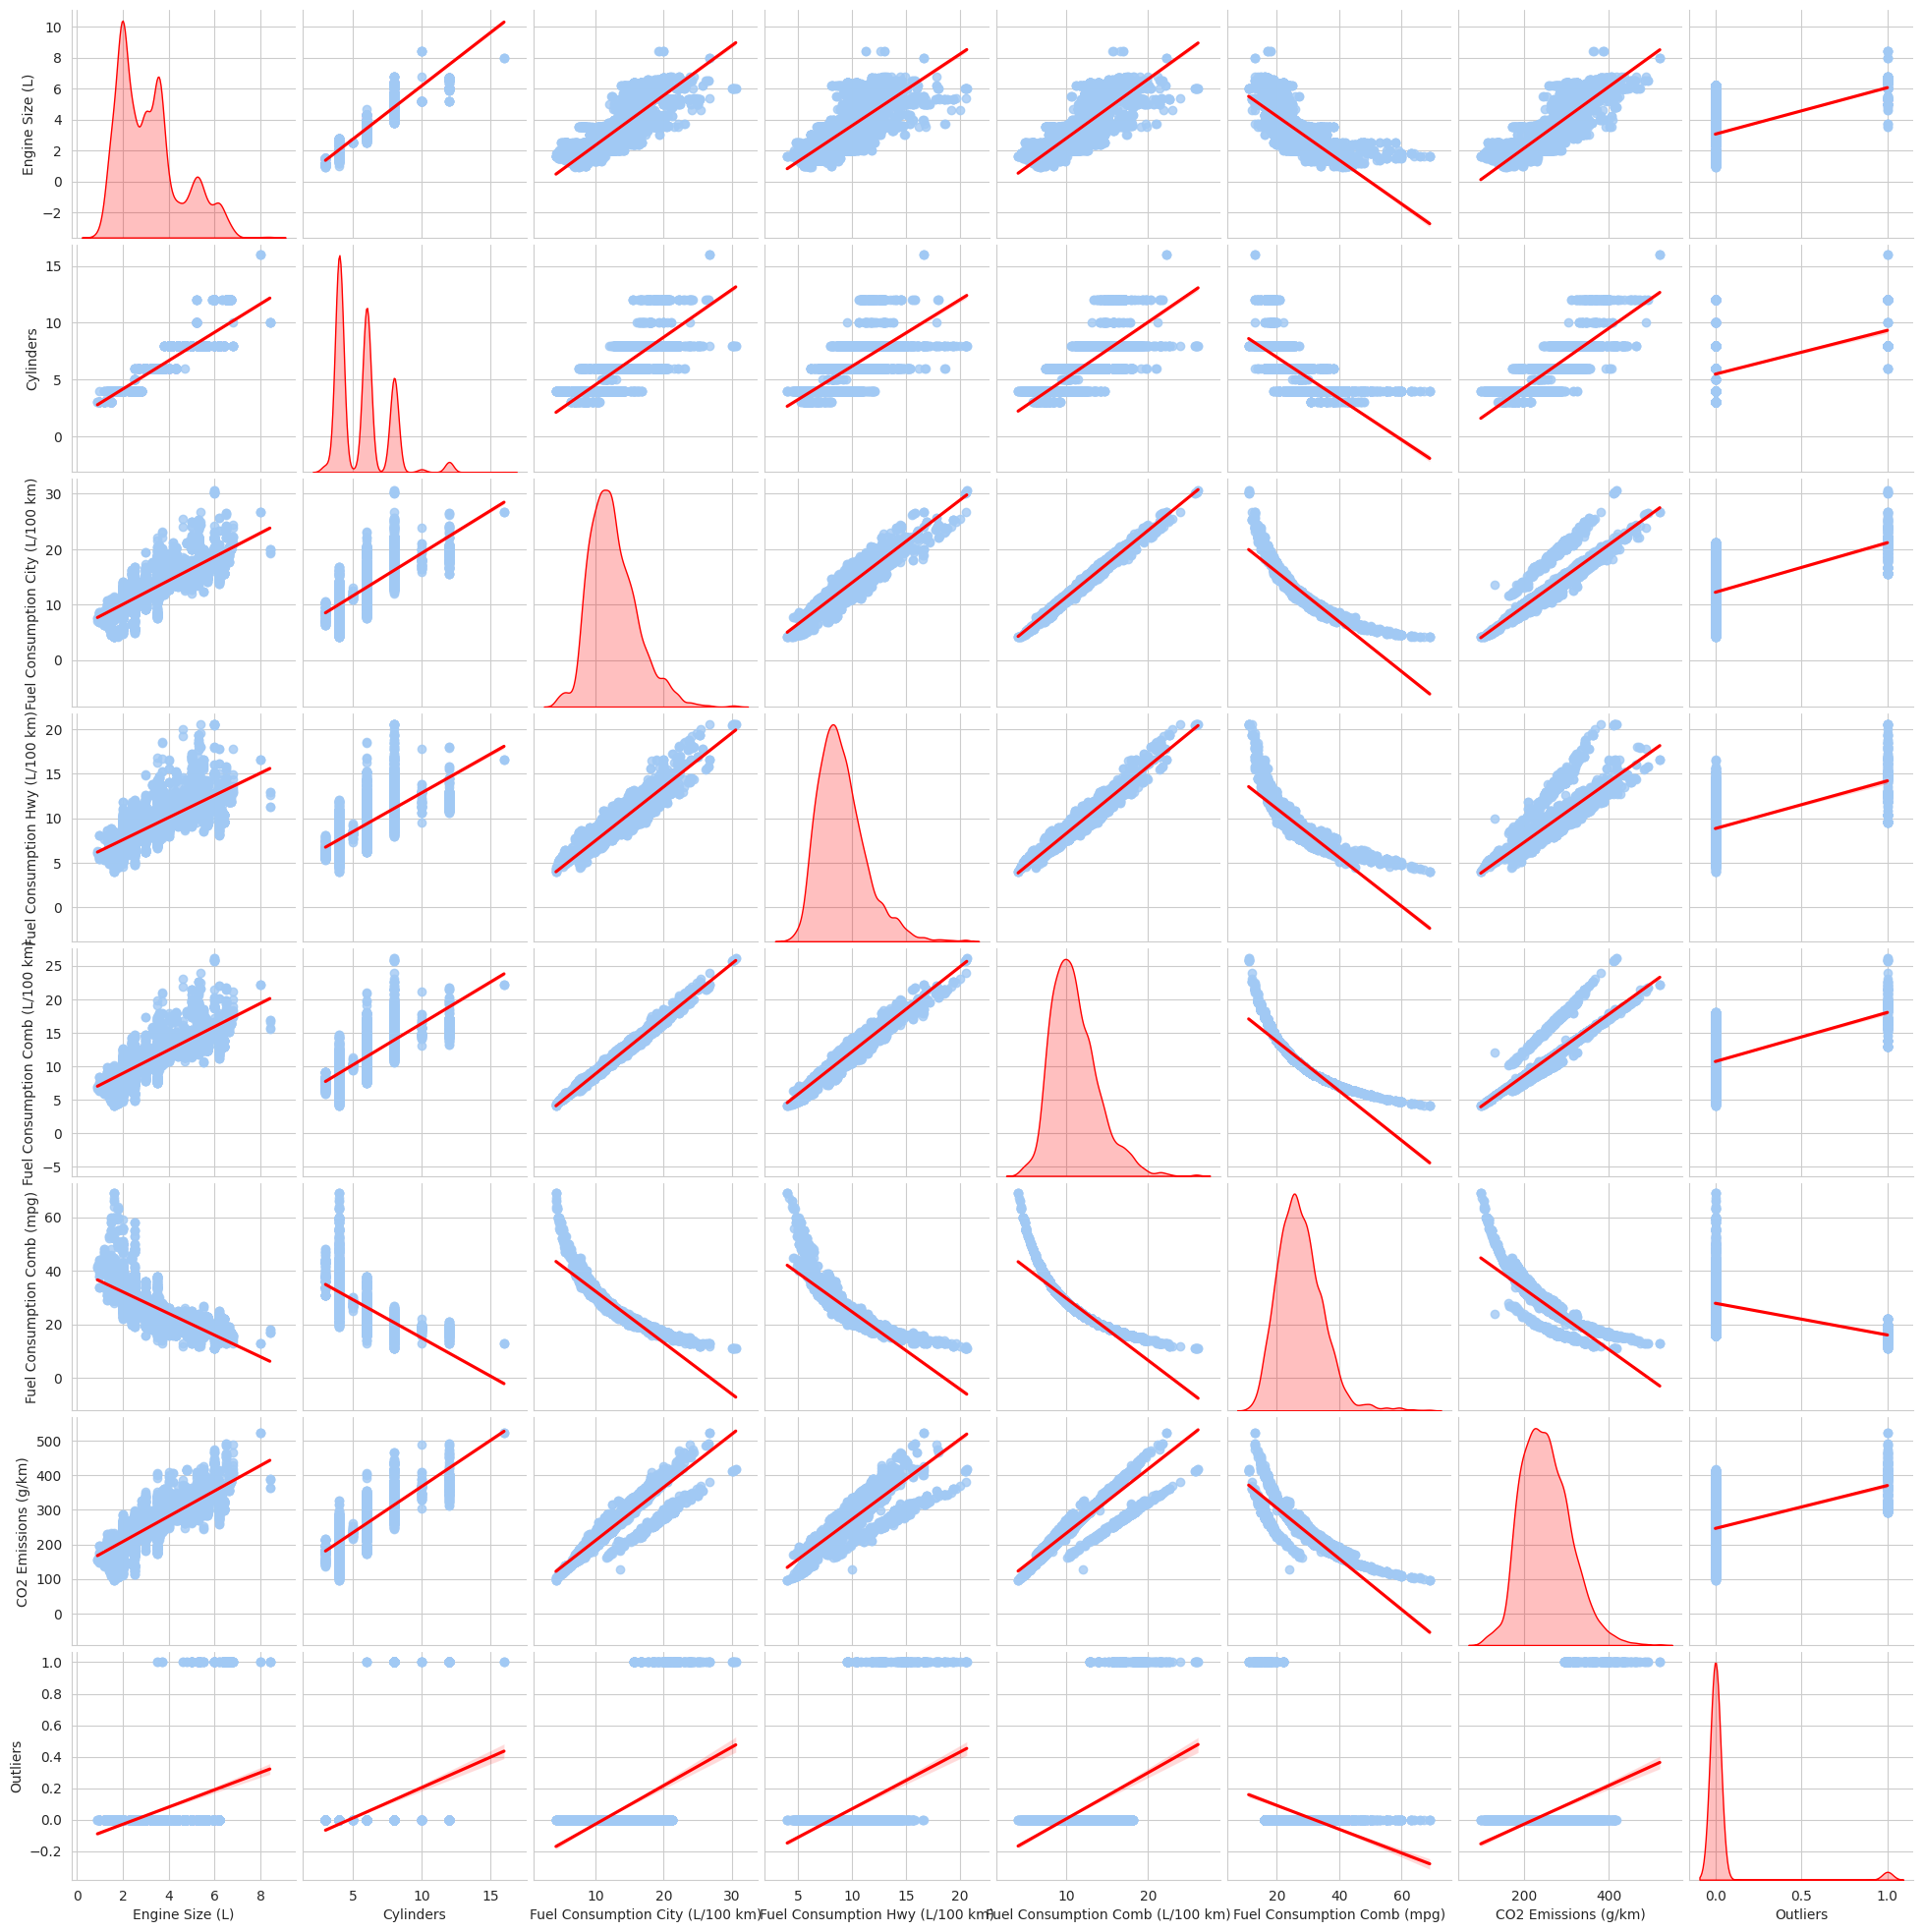

In [ ]:
sns.pairplot(df1, kind = "reg", diag_kind = "kde", diag_kws={"color":"red"}, plot_kws={"line_kws":{"color":"red"}})

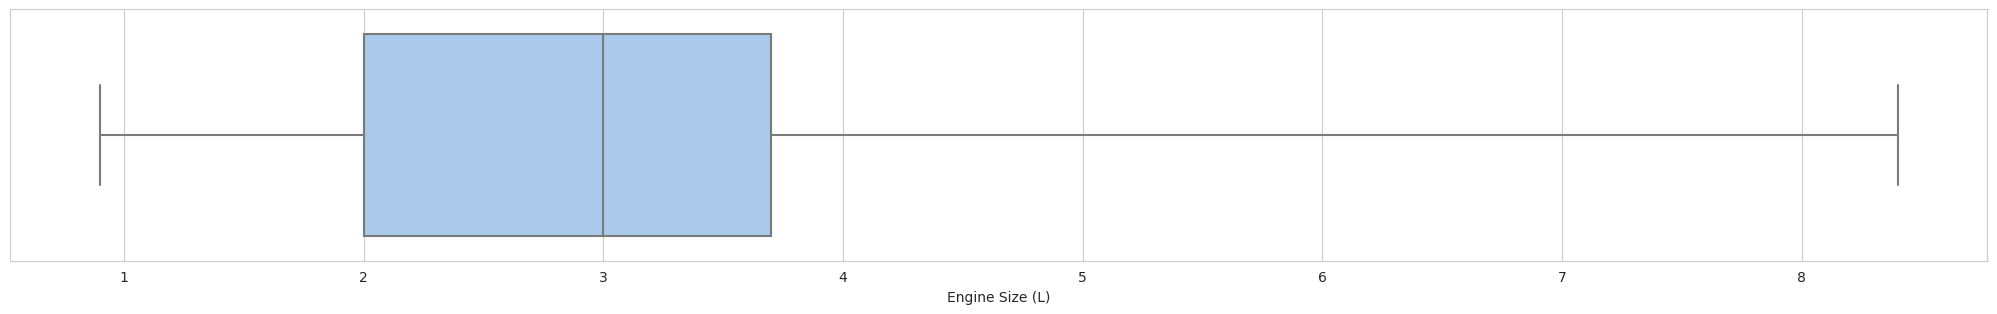

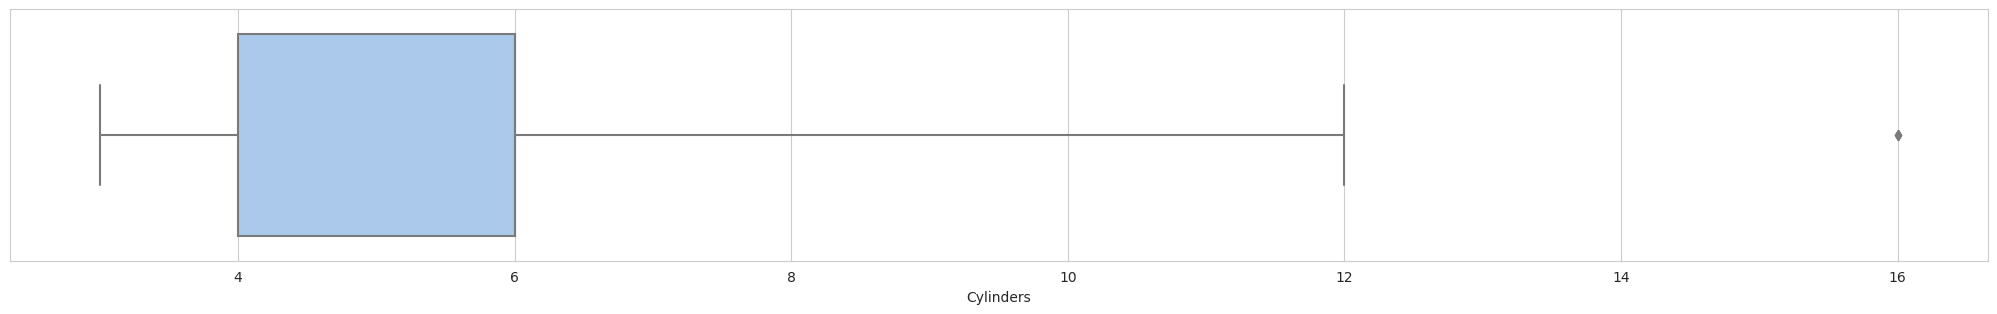

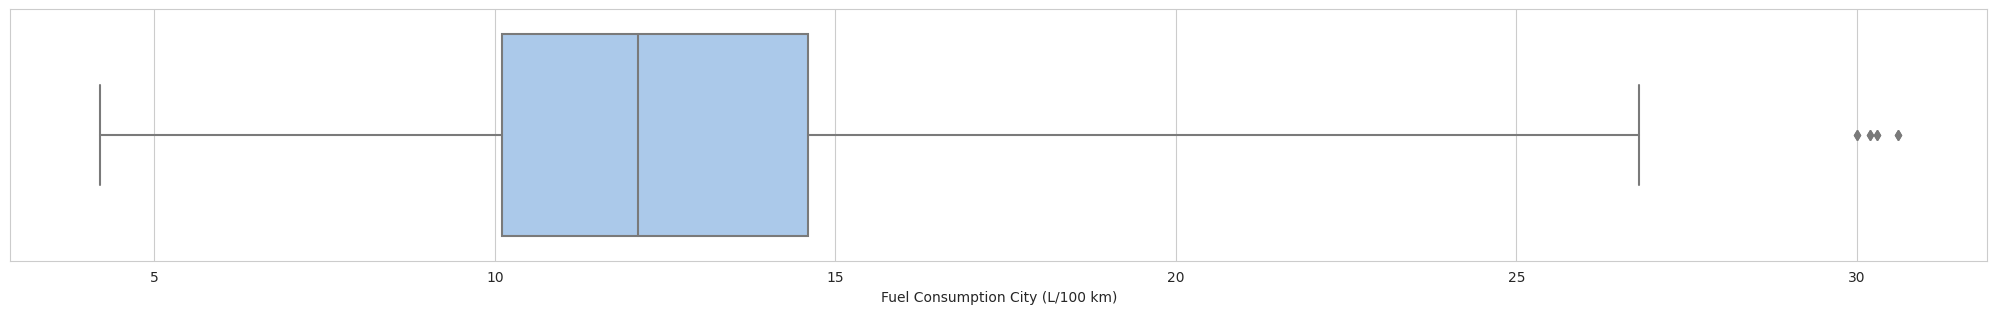

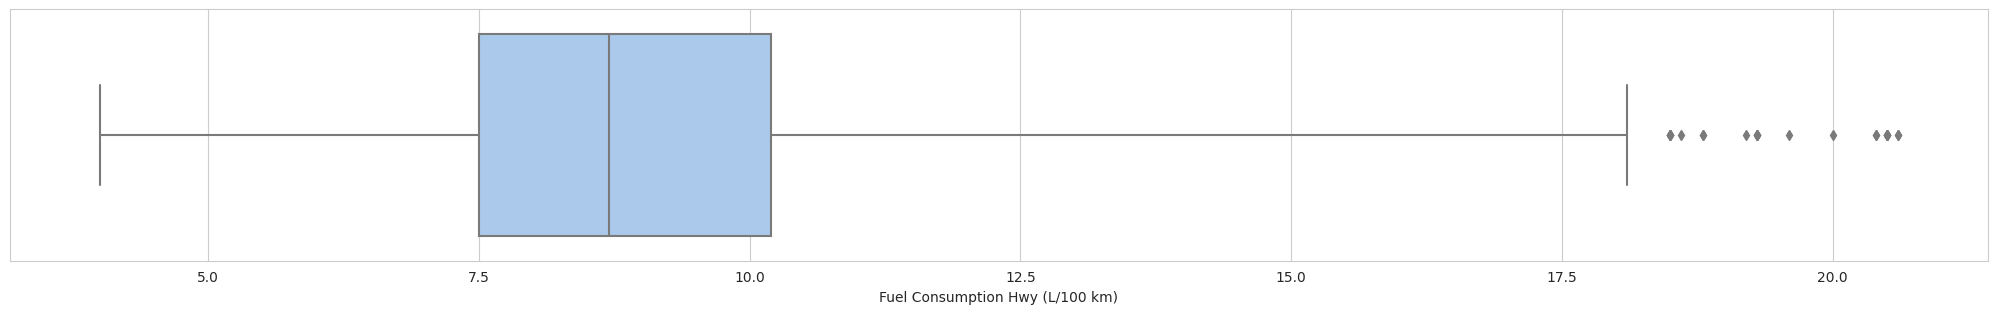

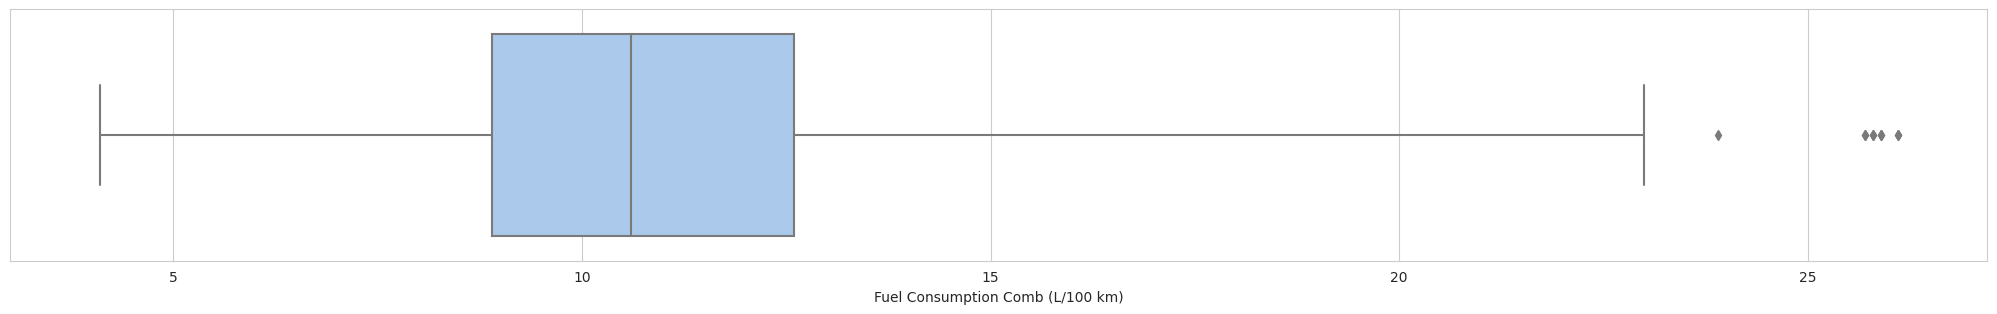

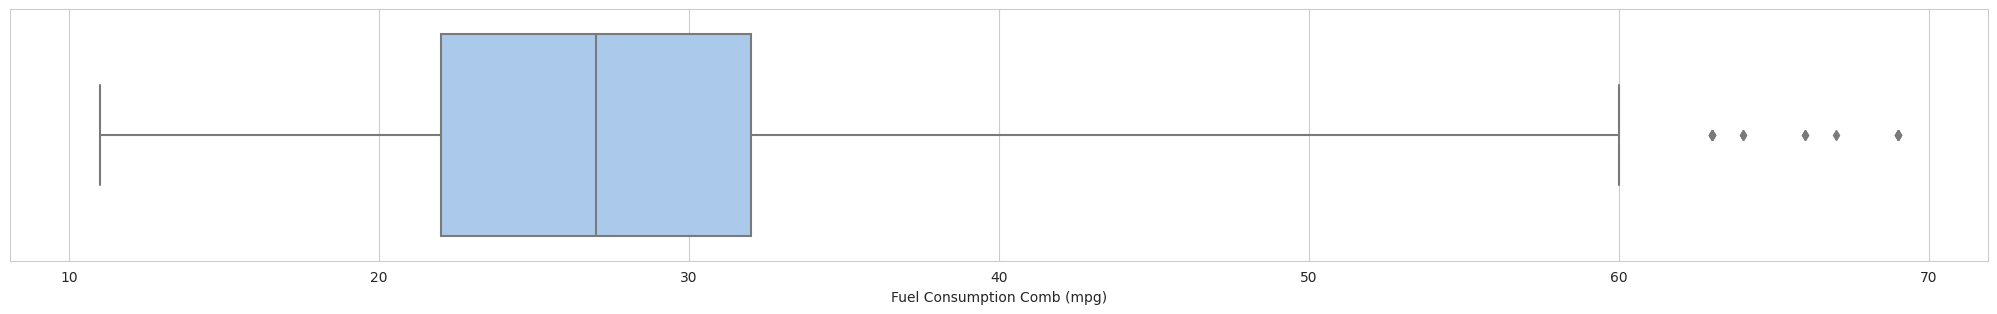

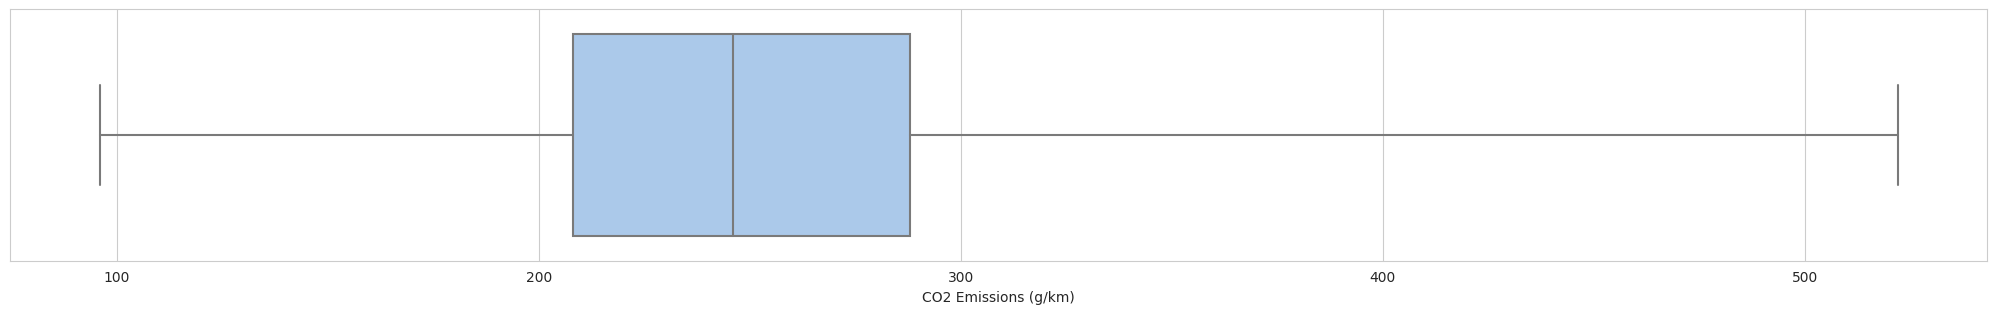

In [ ]:
# Let's draw boxplots and histplots for checking distributions of features;
index=0
for feature in df1.select_dtypes('number').columns:
    index+=1
    plt.figure(figsize=(40,40))
    plt.subplot((len(df1.columns)),2,index)
    sns.boxplot(x=feature,data=df1,whis=3)

    plt.tight_layout()

    plt.show()

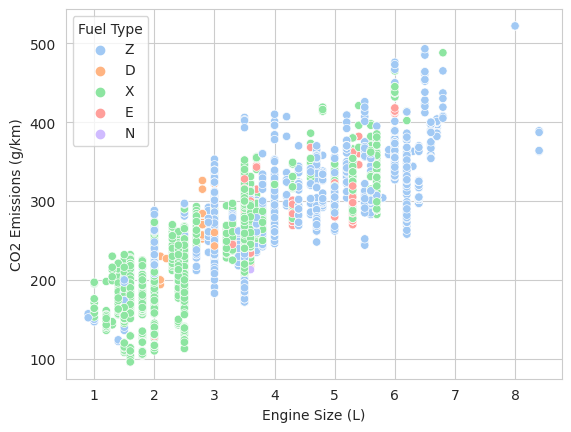

In [ ]:
# Scatterplot for engine_size CO2 emission relationship

sns.scatterplot(x="Engine Size (L)", y="CO2 Emissions (g/km)", data=df1, hue="Fuel Type");

# Regression Analysis

### Model 1 SLR

Mean Squared Error (MSE): 939.4403331445468
R-squared (R2) Score: 0.7218702688223468


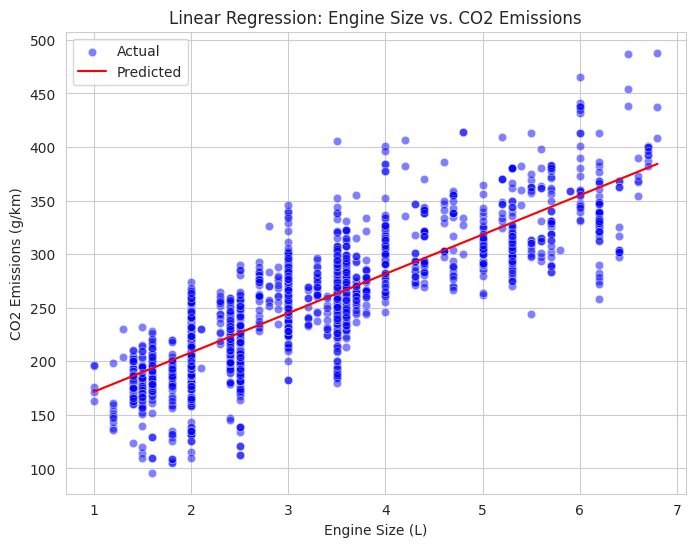

In [ ]:

from sklearn.preprocessing import StandardScaler

# Prepare the data
X = df1[['Engine Size (L)']]  # Predictor variable (feature)
y = df1['CO2 Emissions (g/km)']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model's performance metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

# Visualize the regression line and data points
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['Engine Size (L)'], y=y_test, label='Actual', color='blue', alpha=0.5)
sns.lineplot(x=X_test['Engine Size (L)'], y=y_pred, label='Predicted', color='red')
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.title('Linear Regression: Engine Size vs. CO2 Emissions')
plt.legend()
plt.show()


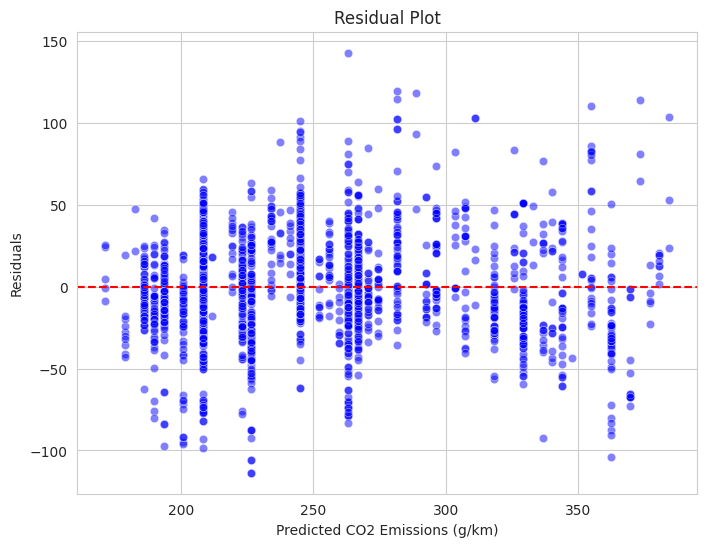

Mean of Residuals: -0.6293179967666718


In [ ]:
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='blue', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted CO2 Emissions (g/km)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Calculate the mean of residuals
residual_mean = np.mean(residuals)

# Print the mean of residuals
print("Mean of Residuals:", residual_mean)

In [ ]:

#the graph of residuals seems to be a bent and curvilinear , so some transformation is needed

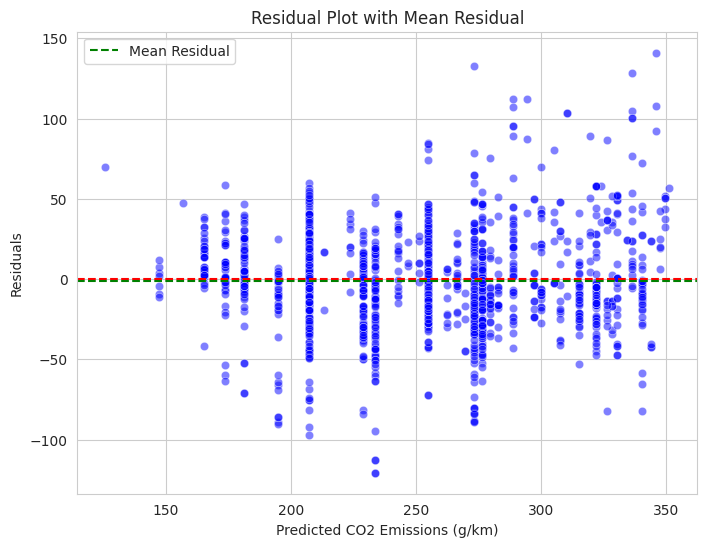

Mean of Residuals: -1.1774909749845786


In [ ]:

# Transform 'Engine Size (L)' by taking the logarithm
df1['Log Engine Size'] = np.log(df1['Engine Size (L)'])

# Prepare the data
X = df1[['Log Engine Size']]  # Predictor variable (feature)
y = df1['CO2 Emissions (g/km)']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Calculate the mean of residuals
residual_mean = np.mean(residuals)

# Create a residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='blue', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.axhline(residual_mean, color='green', linestyle='--', label='Mean Residual')
plt.xlabel('Predicted CO2 Emissions (g/km)')
plt.ylabel('Residuals')
plt.title('Residual Plot with Mean Residual')
plt.legend()
plt.show()

# Print the mean of residuals
print("Mean of Residuals:", residual_mean)


In [ ]:
#log of engine size also doesn't seems to satisfy the assumptions of normality

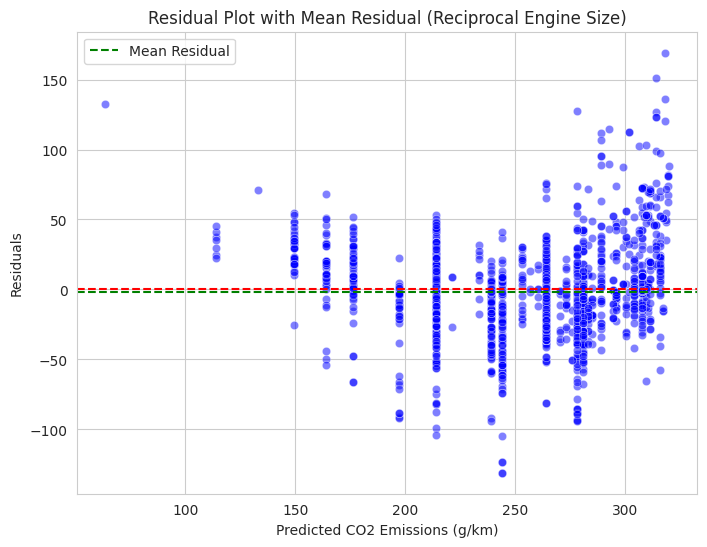

Mean of Residuals: -1.674542188419317
R-squared (R2) Score: 0.658765981968009


In [ ]:

# Transform 'Engine Size (L)' by taking the reciprocal (1/x)
df1['Reciprocal Engine Size'] = 1 / df1['Engine Size (L)']

# Prepare the data
X = df1[['Reciprocal Engine Size']]  # Predictor variable (feature)
y = df1['CO2 Emissions (g/km)']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Calculate the mean of residuals
residual_mean = np.mean(residuals)

# Calculate the R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Create a residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='blue', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.axhline(residual_mean, color='green', linestyle='--', label='Mean Residual')
plt.xlabel('Predicted CO2 Emissions (g/km)')
plt.ylabel('Residuals')
plt.title('Residual Plot with Mean Residual (Reciprocal Engine Size)')
plt.legend()
plt.show()

# Print the mean of residuals and R-squared score
print("Mean of Residuals:", residual_mean)
print("R-squared (R2) Score:", r2)

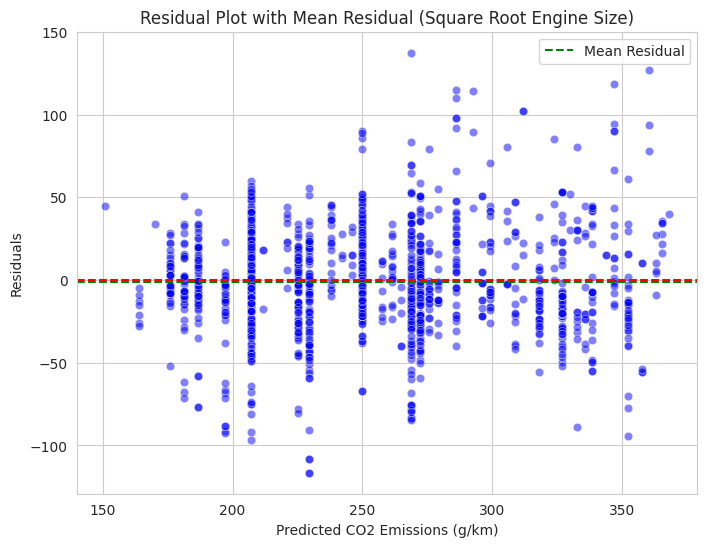

Mean of Residuals: -0.9857272112049158
R-squared (R2) Score: 0.7322586571828196


In [ ]:


# Load your dataset (assuming it's already loaded into a DataFrame named df1)
# Example: df1 = pd.read_csv('your_dataset.csv')

# Transform 'Engine Size (L)' by taking the square root (√x)
df1['Sqrt Engine Size'] = np.sqrt(df1['Engine Size (L)'])

# Prepare the data
X = df1[['Sqrt Engine Size']]  # Predictor variable (feature)
y = df1['CO2 Emissions (g/km)']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Calculate the mean of residuals
residual_mean = np.mean(residuals)

# Calculate the R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Create a residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='blue', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.axhline(residual_mean, color='green', linestyle='--', label='Mean Residual')
plt.xlabel('Predicted CO2 Emissions (g/km)')
plt.ylabel('Residuals')
plt.title('Residual Plot with Mean Residual (Square Root Engine Size)')
plt.legend()
plt.show()

# Print the mean of residuals and R-squared score
print("Mean of Residuals:", residual_mean)
print("R-squared (R2) Score:", r2)


In [ ]:
#checking for influential observation

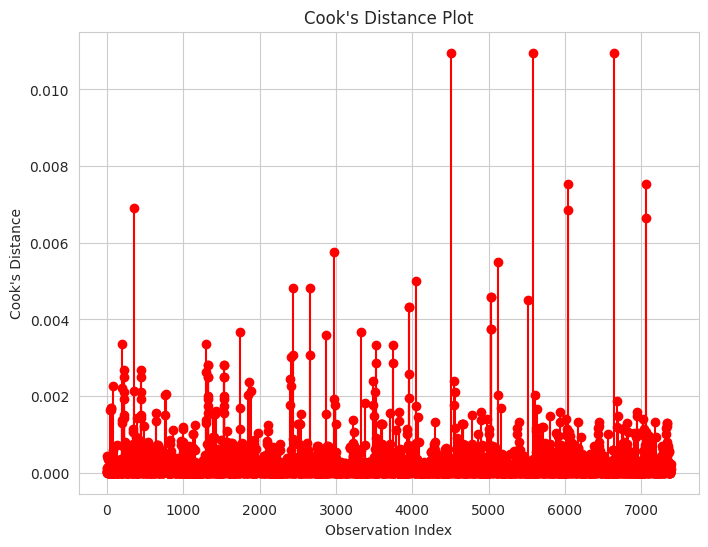

<Figure size 800x600 with 0 Axes>

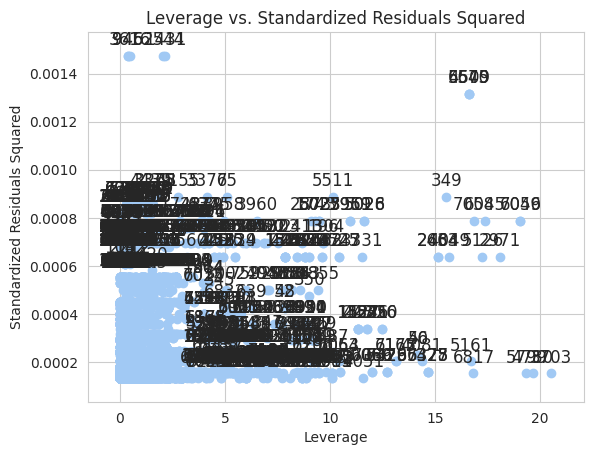

In [ ]:

from statsmodels.graphics.regressionplots import plot_leverage_resid2
from statsmodels.stats.outliers_influence import OLSInfluence

# Load your dataset (assuming it's already loaded into a DataFrame named df1)
# Example: df1 = pd.read_csv('your_dataset.csv')

# Transform 'Engine Size (L)' by taking the square root (√x)
df1['Sqrt Engine Size'] = np.sqrt(df1['Engine Size (L)'])

# Prepare the data
X = df1[['Sqrt Engine Size']]  # Predictor variable (feature)
y = df1['CO2 Emissions (g/km)']  # Target variable

# Fit a linear regression model
from statsmodels.api import OLS, add_constant
X = add_constant(X)  # Add a constant term (intercept) to the model
model = OLS(y, X).fit()

# Calculate Cook's distance for influential observations
influence = OLSInfluence(model)
cook_distance = influence.cooks_distance

# Plot Cook's distance
plt.figure(figsize=(8, 6))
plt.stem(np.arange(len(cook_distance[0])), cook_distance[0], markerfmt='ro', basefmt='r-', linefmt='r-')
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.show()

# Plot leverage vs. standardized residuals squared
plt.figure(figsize=(8, 6))
plot_leverage_resid2(model)
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals Squared')
plt.title('Leverage vs. Standardized Residuals Squared')
plt.show()


## Multilpe Linear Regression Model 2

In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



# Split the dataset into training and testing sets
X = df1[["Engine Size (L)", "Fuel Consumption Comb (L/100 km)"]] # Independent variables
y = df1["CO2 Emissions (g/km)"] # Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Split the data into 70% training and 30% testing

# Create a multiple linear regression model and fit it to the training data
model = LinearRegression() # Create an instance of the LinearRegression class
model.fit(X_train, y_train) # Fit the model to the training data

# Evaluate the model performance on the testing data
y_pred = model.predict(X_test) # Predict the CO2 emissions for the testing data
r2 = r2_score(y_test, y_pred) # Calculate the R-squared score
mse = mean_squared_error(y_test, y_pred) # Calculate the mean squared error
mae = mean_absolute_error(y_test, y_pred) # Calculate the mean absolute error
print("R-squared score:", r2)
print("Mean squared error:", mse)
print("Mean absolute error:", mae)

# Interpret the model coefficients and intercept
coef = model.coef_ # Get the coefficients of the independent variables
intercept = model.intercept_ # Get the intercept of the model
print("Coefficients:", coef)
print("Intercept:", intercept)
print("The regression equation is: CO2 Emissions (g/km) = {:.2f} + {:.2f} * Engine Size (L) + {:.2f} * Fuel Consumption Comb (L/100 km)".format(intercept, coef[0], coef[1]))


R-squared score: 0.8695444453288923
Mean squared error: 440.64044941136075
Mean absolute error: 13.465750487108211
Coefficients: [12.97771149 13.63416994]
Intercept: 60.076927197280156
The regression equation is: CO2 Emissions (g/km) = 60.08 + 12.98 * Engine Size (L) + 13.63 * Fuel Consumption Comb (L/100 km)


####Residual plot open Outward funnel

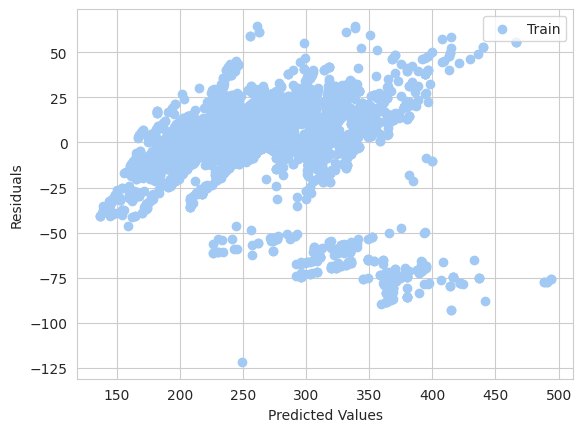

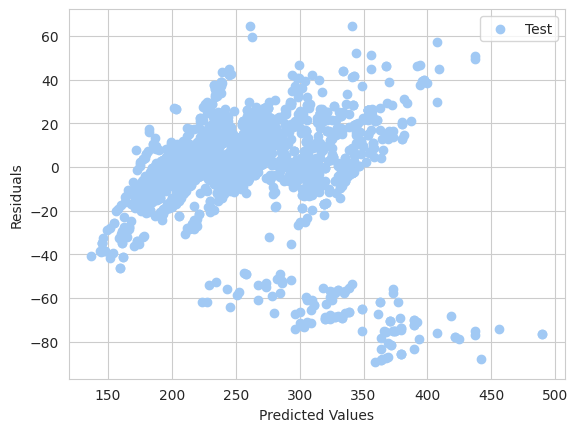

In [ ]:
# Predict the response variable for the training and testing data
y_train_pred = model.predict(X_train) # Predict the response variable for the training data
y_test_pred = model.predict(X_test) # Predict the response variable for the testing data

# Calculate the residuals for the training and testing data
residuals_train = y_train - y_train_pred # Residuals for the training data
residuals_test = y_test - y_test_pred # Residuals for the testing data

# Plot the residuals vs. predicted values for the training and testing data


plt.scatter(y_train_pred, residuals_train, label="Train")

plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.show()

plt.scatter(y_test_pred, residuals_test, label="Test")

plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.show()

#####Applying Box cox transformation

In [ ]:
#we can infer from the residual plots that the varaince is not constant
#the graph is open outward funnel indicating increase in residuals as Yi increases

from scipy.stats import boxcox
y_transformed,lam=boxcox(df1['CO2 Emissions (g/km)'])


In [ ]:
lam

0.2884005044648578

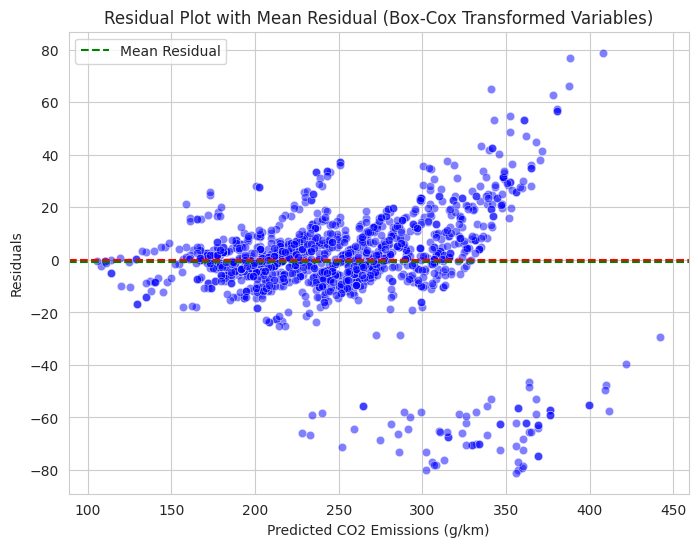

Mean of Residuals: -0.9857272112049158
R-squared (R2) Score: 0.8901840235697934
Mean Squared Error (MSE): 377.72604308311077


In [ ]:

from scipy.stats import boxcox
from scipy.special import inv_boxcox

# Load your dataset (assuming it's already loaded into a DataFrame named df1)
# Example: df1 = pd.read_csv('your_dataset.csv')

# Apply the Box-Cox transformation with lambda = 0.2888400 to 'Engine Size (L)' and 'Fuel Consumption Comb (L/100 km)'
lambda_value = 0.2888400
df1['BoxCox Engine Size'] = boxcox(df1['Engine Size (L)'], lmbda=lambda_value)
df1['BoxCox Fuel Consumption'] = boxcox(df1['Fuel Consumption Comb (L/100 km)'], lmbda=lambda_value)

# Prepare the data
X_1 = df1[['BoxCox Engine Size', 'BoxCox Fuel Consumption']]  # Predictor variables (features)
y_1 = df1['CO2 Emissions (g/km)']  # Target variable

# Split the data into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_1, y_train_1)

# Make predictions on the test data
y_pred_1 = model.predict(X_test_1)

# Calculate residuals
residuals_1 = y_test_1 - y_pred_1

# Calculate the mean of residuals
residual_mean_1 = np.mean(residuals)

# Calculate the R-squared (R2) score
r2_1 = r2_score(y_test_1, y_pred_1)

# Calculate the mean squared error (MSE)
mse_1 = mean_squared_error(y_test_1, y_pred_1)

# Create a residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_1, y=residuals_1, color='blue', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.axhline(residual_mean_1, color='green', linestyle='--', label='Mean Residual')
plt.xlabel('Predicted CO2 Emissions (g/km)')
plt.ylabel('Residuals')
plt.title('Residual Plot with Mean Residual (Box-Cox Transformed Variables)')
plt.legend()
plt.show()

# Print the mean of residuals, R-squared score, and MSE
print("Mean of Residuals:", residual_mean_1)
print("R-squared (R2) Score:", r2_1)
print("Mean Squared Error (MSE):", mse_1)


In [ ]:
#####checking influential observation couunt

In [ ]:
from scipy.special import inv_boxcox

# Assuming you have already applied the Box-Cox transformation
# Inverse transform 'BoxCox Engine Size'
df1['Original Engine Size'] = inv_boxcox(df1['BoxCox Engine Size'], lambda_value)

# Inverse transform 'BoxCox Fuel Consumption'
df1['Original Fuel Consumption'] = inv_boxcox(df1['BoxCox Fuel Consumption'], lambda_value)

# Now df1 contains the original columns 'Original Engine Size' and 'Original Fuel Consumption'


In [ ]:
df1.head()

,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions (g/km),Outliers,Log Engine Size,Reciprocal Engine Size,Sqrt Engine Size,BoxCox Engine Size,BoxCox Fuel Consumption,Original Engine Size,Original Fuel Consumption
0,ACURA,ILX,COMPACT,2.0,4.0,AS,Z,9.9,6.7,8.5,33.0,196.0,False,0.693147,0.500000,1.414214,0.767406,2.961735,2.0,8.5
1,ACURA,ILX,COMPACT,2.4,4.0,M,Z,11.2,7.7,9.6,29.0,221.0,False,0.875469,0.416667,1.549193,0.996110,3.191555,2.4,9.6
2,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV,Z,6.0,5.8,5.9,48.0,136.0,False,0.405465,0.666667,1.224745,0.430163,2.318777,1.5,5.9
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6.0,AS,Z,12.7,9.1,11.1,25.0,255.0,False,1.252763,0.285714,1.870829,1.509420,3.476506,3.5,11.1
4,ACURA,RDX AWD,SUV - SMALL,3.5,6.0,AS,Z,12.1,8.7,10.6,27.0,244.0,False,1.252763,0.285714,1.870829,1.509420,3.384745,3.5,10.6


In [ ]:
import statsmodels.api as sm
import numpy as np

# Assuming you have your predictor variables and target variable prepared in X and y

# Create the design matrix (add a constant term for the intercept)
X = sm.add_constant(X)

# Create a linear regression model without fitting it
model = sm.OLS(y, X)

# Fit the model to get influence statistics
results = model.fit()

# Calculate leverage scores
leverage = results.get_influence().hat_matrix_diag

# Set a threshold for identifying potentially influential observations (e.g., 2 * (p+1) / n, where p is the number of predictors and n is the sample size)
threshold = 2 * (X.shape[1] / X.shape[0])

# Identify potentially influential observations in 'Engine Size (L)' and 'Fuel Consumption Comb (L/100 km)'
influential_observation_engine_size = np.where(leverage > threshold)[0]
influential_observation_fuel_consumption = np.where(leverage > threshold)[0]

# Count potentially influential observations
count_influential_engine_size = len(influential_observation_engine_size)
count_influential_fuel_consumption = len(influential_observation_fuel_consumption)

# Print the count of potentially influential observations for each variable
print("Number of Potentially Influential Observations in Engine Size:", count_influential_engine_size)
print("Number of Potentially Influential Observations in Fuel Consumption:", count_influential_fuel_consumption)


Number of Potentially Influential Observations in Engine Size: 791
Number of Potentially Influential Observations in Fuel Consumption: 791


#### removing influential observtaion and fitting model

In [ ]:

# Create a copy of the original DataFrame (assuming your DataFrame is named df1)
df_copy = df1.copy()

# Calculate Cook's distance
influence = results.get_influence()
cook_distance = influence.cooks_distance[0]  # Access the first element to get the array

# Calculate leverage scores
leverage = influence.hat_matrix_diag

# Set a threshold for identifying influential observations (e.g., 1.0)
threshold = 1.0

# Identify influential observations
influential_observation_indices = np.where((cook_distance > threshold) | (leverage > threshold))[0]

# Remove influential observations from the copied DataFrame
df_copy.drop(df_copy.index[influential_observation_indices], inplace=True)

# Now df_copy contains your original data with influential observations removed


R-squared (R2) Score (Train): 0.8741051923844013
R-squared (R2) Score (Test): 0.8711362656104268
Mean Squared Error (MSE) (Train): 430.37782302036027
Mean Squared Error (MSE) (Test): 443.2432335455481


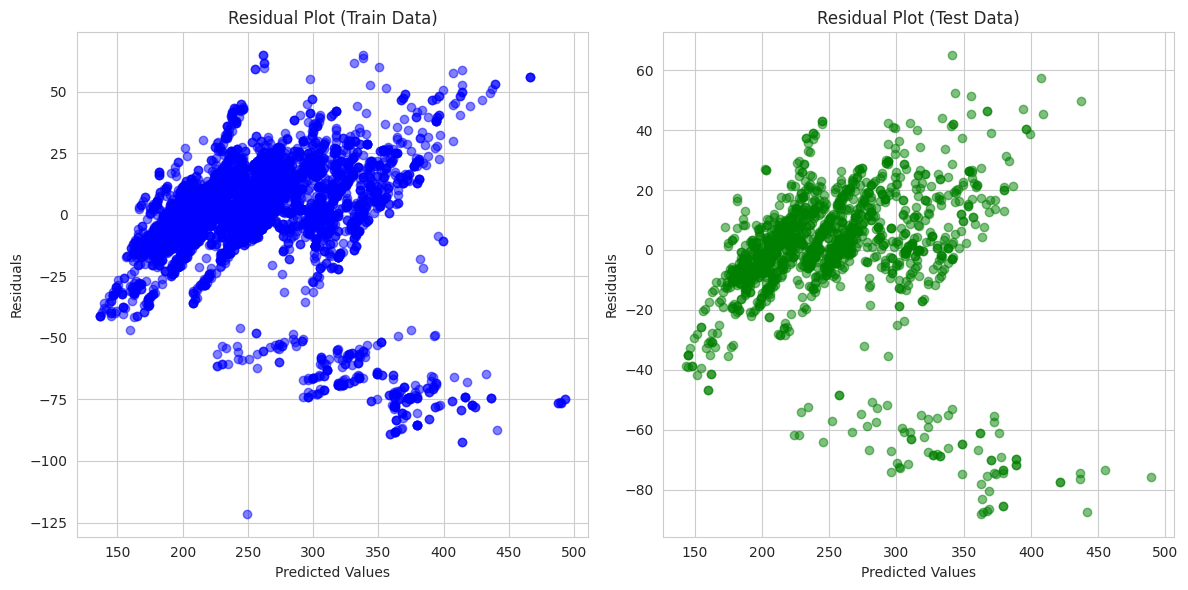

In [ ]:


# Split the data into train and test sets (e.g., 80% train, 20% test)
X = df_copy[['Engine Size (L)', 'Fuel Consumption Comb (L/100 km)']]
y = df_copy['CO2 Emissions (g/km)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant term for the intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit an MLR model on the training data
model = sm.OLS(y_train, X_train).fit()

# Make predictions on both training and test data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate R2 score for train and test data
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Calculate MSE for train and test data
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Print R2 and MSE scores
print("R-squared (R2) Score (Train):", r2_train)
print("R-squared (R2) Score (Test):", r2_test)
print("Mean Squared Error (MSE) (Train):", mse_train)
print("Mean Squared Error (MSE) (Test):", mse_test)

# Create residual plots for train and test data
plt.figure(figsize=(12, 6))

# Residual Plot for Train Data
plt.subplot(1, 2, 1)
residuals_train = y_train - y_pred_train
plt.scatter(y_pred_train, residuals_train, color="b", alpha=0.5)
plt.title("Residual Plot (Train Data)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

# Residual Plot for Test Data
plt.subplot(1, 2, 2)
residuals_test = y_test - y_pred_test
plt.scatter(y_pred_test, residuals_test, color="g", alpha=0.5)
plt.title("Residual Plot (Test Data)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()





###### the open outward funnel is again depicted

R-squared (R2) Score (Train): 0.8423216939180607
R-squared (R2) Score (Test): 0.8366461941265546
Mean Squared Error (MSE) (Train): 0.008707788870555847
Mean Squared Error (MSE) (Test): 0.009272251646259949


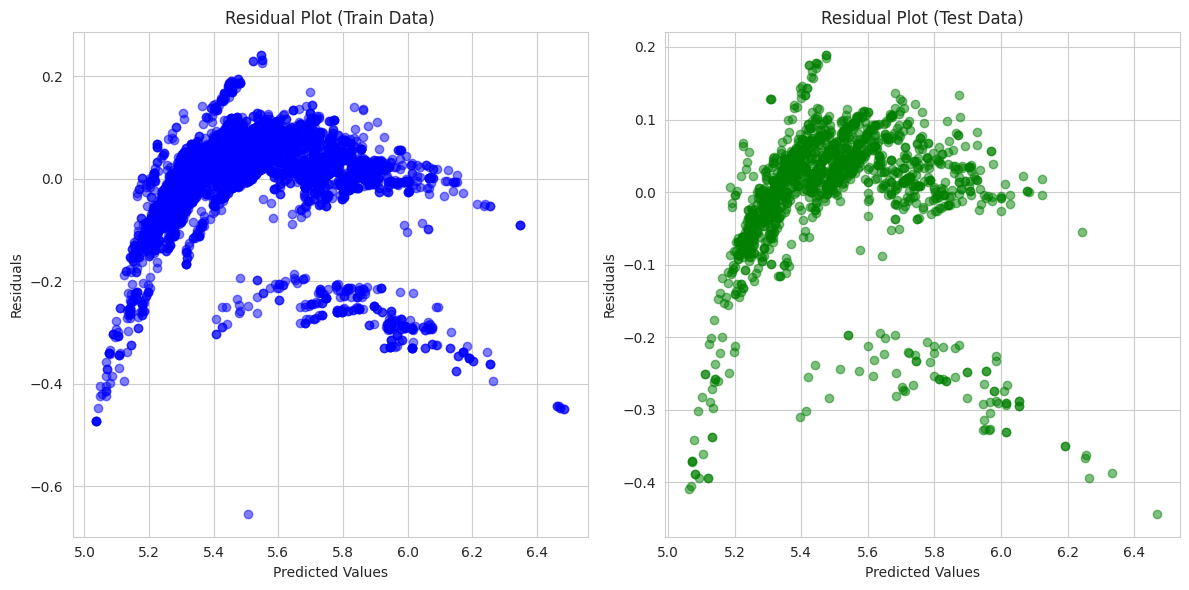

In [ ]:


# Assuming you have a DataFrame 'df_copy' with influential observations removed

# Apply a log transformation to the dependent variable 'CO2 Emissions(g/km)'
df_copy['Log CO2 Emissions'] = np.log(df_copy['CO2 Emissions (g/km)'])

# Split the data into train and test sets (e.g., 80% train, 20% test)
X = df_copy[['Engine Size (L)', 'Fuel Consumption Comb (L/100 km)']]
y = df_copy['Log CO2 Emissions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant term for the intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit an MLR model on the training data
model = sm.OLS(y_train, X_train).fit()

# Make predictions on both training and test data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate R2 score for train and test data
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Calculate MSE for train and test data
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Print R2 and MSE scores
print("R-squared (R2) Score (Train):", r2_train)
print("R-squared (R2) Score (Test):", r2_test)
print("Mean Squared Error (MSE) (Train):", mse_train)
print("Mean Squared Error (MSE) (Test):", mse_test)

# Create residual plots for train and test data
plt.figure(figsize=(12, 6))

# Residual Plot for Train Data
plt.subplot(1, 2, 1)
residuals_train = y_train - y_pred_train
plt.scatter(y_pred_train, residuals_train, color="b", alpha=0.5)
plt.title("Residual Plot (Train Data)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

# Residual Plot for Test Data
plt.subplot(1, 2, 2)
residuals_test = y_test - y_pred_test
plt.scatter(y_pred_test, residuals_test, color="g", alpha=0.5)
plt.title("Residual Plot (Test Data)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()


In [ ]:
import statsmodels.api as sm

# Assuming you have a DataFrame 'df_copy' and an MLR model 'model_copy' fitted on it

# Create a function for backward elimination
def backward_elimination(X, y, model):
    num_features = X.shape[1]
    for i in range(num_features):
        X_with_intercept = sm.add_constant(X)
        results = sm.OLS(y, X_with_intercept).fit()
        max_pvalue = max(results.pvalues)
        if max_pvalue > 0.05:  # Adjust the significance level (e.g., 0.05) as needed
            feature_to_remove = results.pvalues.idxmax()
            X = X.drop(feature_to_remove, axis=1)
        else:
            break
    return results

# Extract the predictor variables and the target variable from df_copy
X_copy = df_copy[['Engine Size (L)', 'Fuel Consumption Comb (L/100 km)']]
y_copy = df_copy['CO2 Emissions (g/km)']

# Apply backward elimination to the model
final_results = backward_elimination(X_copy, y_copy, df_copy)

# Print the summary of the final model after backward elimination
print(final_results.summary())


                             OLS Regression Results                             
Dep. Variable:     CO2 Emissions (g/km)   R-squared:                       0.874
Model:                              OLS   Adj. R-squared:                  0.873
Method:                   Least Squares   F-statistic:                 2.549e+04
Date:                  Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                          05:12:23   Log-Likelihood:                -32895.
No. Observations:                  7385   AIC:                         6.580e+04
Df Residuals:                      7382   BIC:                         6.582e+04
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [ ]:
#we can conclude that both the variables are necessary for explaining the variability in th edata

In [ ]:
df_copy.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size (L)                     float64
Cylinders                           float64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)         float64
CO2 Emissions (g/km)                float64
Outliers                               bool
Log Engine Size                     float64
Reciprocal Engine Size              float64
Sqrt Engine Size                    float64
BoxCox Engine Size                  float64
BoxCox Fuel Consumption             float64
Original Engine Size                float64
Original Fuel Consumption           float64
Log CO2 Emissions                   float64
dtype: object

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have a DataFrame 'df_copy' with the necessary columns

# Split the data into train and test sets
X = df_copy[['Engine Size (L)', 'Fuel Consumption Comb (L/100 km)']]
y = df_copy['CO2 Emissions (g/km)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the predictor variables (features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit an MLR model on the standardized data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_test = model.predict(X_test_scaled)

# Calculate R2 score and MSE
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

# Print R2 score and MSE
print("R-squared (R2) Score (Test):", r2_test)
print("Mean Squared Error (MSE) (Test):", mse_test)


R-squared (R2) Score (Test): 0.8711362656104268
Mean Squared Error (MSE) (Test): 443.2432335455481


In [ ]:
df_copy.shape

(7385, 21)

In [ ]:
df.shape

(7385, 12)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming you have a DataFrame 'df_copy' with the necessary columns

# Split the data into train and test sets
X = df_copy[['Engine Size (L)', 'Fuel Consumption Comb (L/100 km)']]
y = df_copy['CO2 Emissions (g/km)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the predictor variables (features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit an MLR model on the standardized training data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Calculate residuals
y_pred_train = model.predict(X_train_scaled)
residuals = y_train - y_pred_train

# Use statsmodels to get summary and influence statistics
X_train_with_intercept = sm.add_constant(X_train_scaled)
model_stats = sm.OLS(y_train, X_train_with_intercept).fit()
influence = model_stats.get_influence()
cook_distance = influence.cooks_distance[0]

# Define a threshold for Cook's distance to identify influential observations
threshold = 4 / len(X_train)

# Identify influential observations based on 'Engine Size (L)' and 'Fuel Consumption Comb (L/100 km)'
influential_indices = np.where(cook_distance > threshold)

# Create a new DataFrame without influential observations
df_cleaned = df_copy.drop(df_copy.index[influential_indices])

# Split the cleaned data into train and test sets
X_cleaned = df_cleaned[['Engine Size (L)', 'Fuel Consumption Comb (L/100 km)']]
y_cleaned = df_cleaned['CO2 Emissions (g/km)']
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Standardize the predictor variables for the cleaned data
X_train_cleaned_scaled = scaler.fit_transform(X_train_cleaned)
X_test_cleaned_scaled = scaler.transform(X_test_cleaned)

# Fit an MLR model on the cleaned data
model_cleaned = LinearRegression()
model_cleaned.fit(X_train_cleaned_scaled, y_train_cleaned)

# Make predictions on the test data
y_pred_test_cleaned = model_cleaned.predict(X_test_cleaned_scaled)

# Calculate R2 score and MSE for the cleaned model
r2_test_cleaned = r2_score(y_test_cleaned, y_pred_test_cleaned)
mse_test_cleaned = mean_squared_error(y_test_cleaned, y_pred_test_cleaned)

# Print R2 score and MSE for the cleaned model
print("R-squared (R2) Score (Test) after removing influential observations:", r2_test_cleaned)
print("Mean Squared Error (MSE) (Test) after removing influential observations:", mse_test_cleaned)


R-squared (R2) Score (Test) after removing influential observations: 0.8701317062666366
Mean Squared Error (MSE) (Test) after removing influential observations: 469.0028540547241


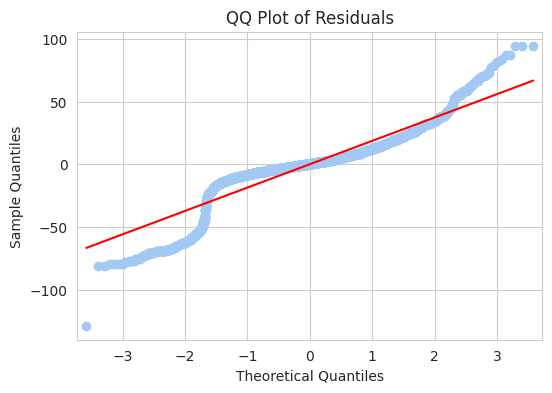

R-squared (R2) Score (Test) after log transformation: 0.9070882284378238
Mean Squared Error (MSE) (Test) after log transformation: 335.36146575487317
Residual Means after log transformation: 2.1628978605128034e-14


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming you have a DataFrame 'df_copy' with the necessary columns

# Apply log transformation to 'Fuel Consumption Comb (L/100 km)' column
df_copy['Log Fuel Consumption Comb'] = np.log(df_copy['Fuel Consumption Comb (L/100 km)'])

# Split the data into train and test sets
X = df_copy[['Engine Size (L)', 'Log Fuel Consumption Comb']]
y = df_copy['CO2 Emissions (g/km)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the predictor variables (features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit an MLR model on the standardized training data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Calculate residuals
y_pred_train = model.predict(X_train_scaled)
residuals = y_train - y_pred_train

# Use statsmodels to get summary and influence statistics
X_train_with_intercept = sm.add_constant(X_train_scaled)
model_stats = sm.OLS(y_train, X_train_with_intercept).fit()
influence = model_stats.get_influence()
cook_distance = influence.cooks_distance[0]

# Define a threshold for Cook's distance to identify influential observations
threshold = 4 / len(X_train)

# Identify influential observations
influential_indices = np.where(cook_distance > threshold)

# Create a new DataFrame without influential observations
df_cleaned = df_copy.drop(df_copy.index[influential_indices])

# Split the cleaned data into train and test sets
X_cleaned = df_cleaned[['Engine Size (L)', 'Log Fuel Consumption Comb']]
y_cleaned = df_cleaned['CO2 Emissions (g/km)']
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Standardize the predictor variables for the cleaned data
X_train_cleaned_scaled = scaler.fit_transform(X_train_cleaned)
X_test_cleaned_scaled = scaler.transform(X_test_cleaned)

# Fit an MLR model on the cleaned data
model_cleaned = LinearRegression()
model_cleaned.fit(X_train_cleaned_scaled, y_train_cleaned)

# Make predictions on the test data
y_pred_test_cleaned = model_cleaned.predict(X_test_cleaned_scaled)

# Calculate R2 score and MSE for the cleaned model
r2_test_cleaned = r2_score(y_test_cleaned, y_pred_test_cleaned)
mse_test_cleaned = mean_squared_error(y_test_cleaned, y_pred_test_cleaned)

# Calculate residual means
residual_means = residuals.mean()

# Plot QQ plot
fig, ax = plt.subplots(figsize=(6, 4))
sm.qqplot(residuals, line='s', ax=ax)
plt.title("QQ Plot of Residuals")
plt.show()

# Print R2 score, MSE, and residual means for the cleaned model
print("R-squared (R2) Score (Test) after log transformation:", r2_test_cleaned)
print("Mean Squared Error (MSE) (Test) after log transformation:", mse_test_cleaned)
print("Residual Means after log transformation:", residual_means)


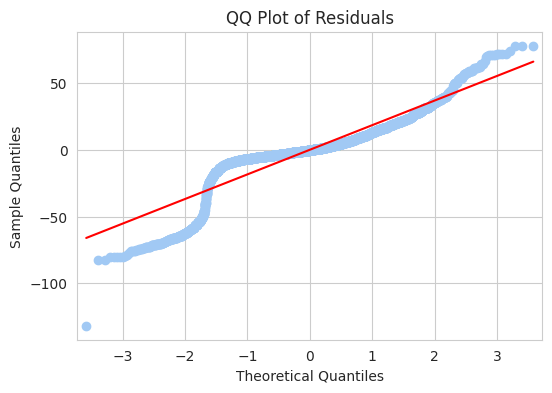

R-squared (R2) Score (Test) after transformations: 0.9081393409391022
Mean Squared Error (MSE) (Test) after transformations: 324.1809381936314
Residual Means after transformations: -5.3110303336435385e-15


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming you have a DataFrame 'df_copy' with the necessary columns

# Apply log transformation to 'Fuel Consumption Comb (L/100 km)' column
df_copy['Log Fuel Consumption Comb'] = np.log(df_copy['Fuel Consumption Comb (L/100 km)'])

# Square the 'Engine Size (L)' column
df_copy['Squared Engine Size'] = df_copy['Engine Size (L)'] ** 2

# Split the data into train and test sets
X = df_copy[['Squared Engine Size', 'Log Fuel Consumption Comb']]
y = df_copy['CO2 Emissions (g/km)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the predictor variables (features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit an MLR model on the standardized training data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Calculate residuals
y_pred_train = model.predict(X_train_scaled)
residuals = y_train - y_pred_train

# Use statsmodels to get summary and influence statistics
X_train_with_intercept = sm.add_constant(X_train_scaled)
model_stats = sm.OLS(y_train, X_train_with_intercept).fit()
influence = model_stats.get_influence()
cook_distance = influence.cooks_distance[0]

# Define a threshold for Cook's distance to identify influential observations
threshold = 4 / len(X_train)

# Identify influential observations
influential_indices = np.where(cook_distance > threshold)

# Create a new DataFrame without influential observations
df_cleaned = df_copy.drop(df_copy.index[influential_indices])

# Split the cleaned data into train and test sets
X_cleaned = df_cleaned[['Squared Engine Size', 'Log Fuel Consumption Comb']]
y_cleaned = df_cleaned['CO2 Emissions (g/km)']
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Standardize the predictor variables for the cleaned data
X_train_cleaned_scaled = scaler.fit_transform(X_train_cleaned)
X_test_cleaned_scaled = scaler.transform(X_test_cleaned)

# Fit an MLR model on the cleaned data
model_cleaned = LinearRegression()
model_cleaned.fit(X_train_cleaned_scaled, y_train_cleaned)

# Make predictions on the test data
y_pred_test_cleaned = model_cleaned.predict(X_test_cleaned_scaled)

# Calculate R2 score and MSE for the cleaned model
r2_test_cleaned = r2_score(y_test_cleaned, y_pred_test_cleaned)
mse_test_cleaned = mean_squared_error(y_test_cleaned, y_pred_test_cleaned)

# Calculate residual means
residual_means = residuals.mean()

# Plot QQ plot
fig, ax = plt.subplots(figsize=(6, 4))
sm.qqplot(residuals, line='s', ax=ax)
plt.title("QQ Plot of Residuals")
plt.show()

# Print R2 score, MSE, and residual means for the cleaned model
print("R-squared (R2) Score (Test) after transformations:", r2_test_cleaned)
print("Mean Squared Error (MSE) (Test) after transformations:", mse_test_cleaned)
print("Residual Means after transformations:", residual_means)


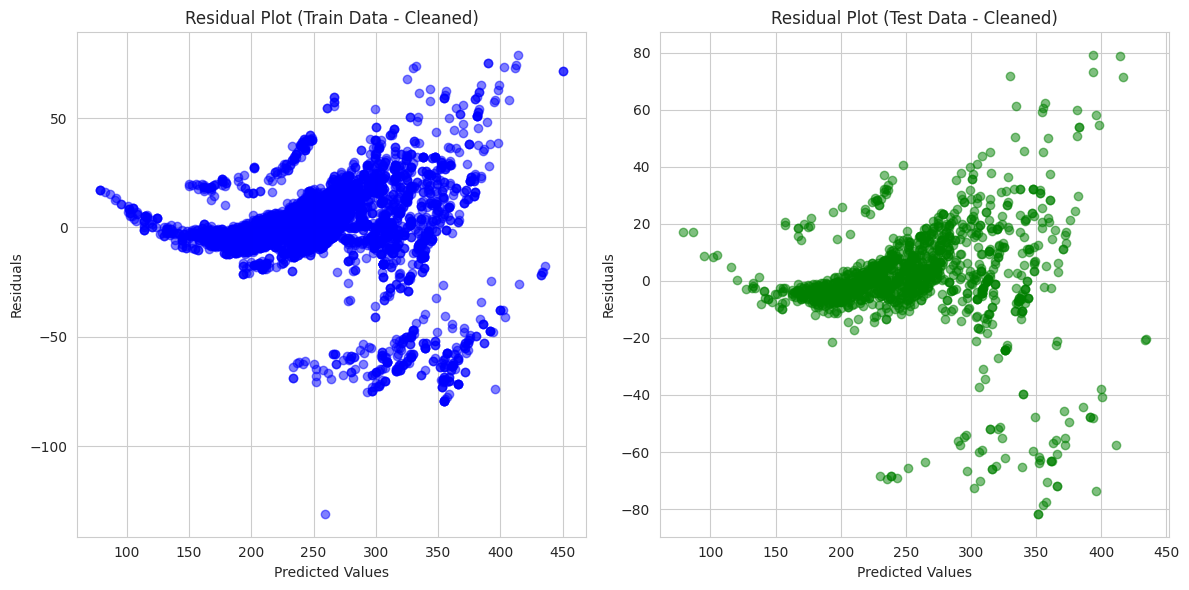

In [ ]:
# Calculate residuals for the cleaned model with transformations
y_pred_train_cleaned = model_cleaned.predict(X_train_cleaned_scaled)
residuals_cleaned = y_train_cleaned - y_pred_train_cleaned

# Residual Plot for Train Data (Cleaned)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_pred_train_cleaned, residuals_cleaned, c='blue', marker='o', alpha=0.5)
plt.title("Residual Plot (Train Data - Cleaned)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

# Residual Plot for Test Data (Cleaned)
y_pred_test_cleaned = model_cleaned.predict(X_test_cleaned_scaled)
residuals_test_cleaned = y_test_cleaned - y_pred_test_cleaned

plt.subplot(1, 2, 2)
plt.scatter(y_pred_test_cleaned, residuals_test_cleaned, c='green', marker='o', alpha=0.5)
plt.title("Residual Plot (Test Data - Cleaned)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()


In [ ]:
df_2=df.copy()

In [ ]:
df_2.shape

(7385, 12)

In [ ]:
import statsmodels.api as sm
import numpy as np

# Define your predictor and response variables
X = df_2[['Engine Size (L)', 'Fuel Consumption Comb (L/100 km)']]
y = df_2['CO2 Emissions (g/km)']

# Add a constant to the predictor variable
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Calculate Cook's distance
influence = results.get_influence()
(c, p) = influence.cooks_distance


# Define a boolean mask for influential observations (this is subjective, here we use the 75th percentile as the cutoff)
influential_mask = np.isfinite(c) & (c > np.percentile(c, 75))

# Create a separate DataFrame for influential observations
df_influential = df_2.loc[influential_mask]

# Remove influential observations from the original DataFrame
df_2 = df_2.loc[~influential_mask]

In [ ]:
df_2.shape

(5541, 12)

In [ ]:
# Fit initial OLS model
model_ols = sm.OLS(df_2['CO2 Emissions (g/km)'], sm.add_constant(df_2[['Engine Size (L)', 'Fuel Consumption Comb (L/100 km)']]))
results_ols = model_ols.fit()

# Calculate squared residuals
squared_residuals = results_ols.resid**2


In [ ]:
# Define weights as the inverse of the squared residuals
weights = 1.0 / squared_residuals

# Fit the WLS model
model_wls = sm.WLS(df_2['CO2 Emissions (g/km)'], sm.add_constant(df_2[['Engine Size (L)', 'Fuel Consumption Comb (L/100 km)']]), weights=weights)
results_wls = model_wls.fit()


R-squared:  0.9999974350340572
MSE:  12.865982027297369


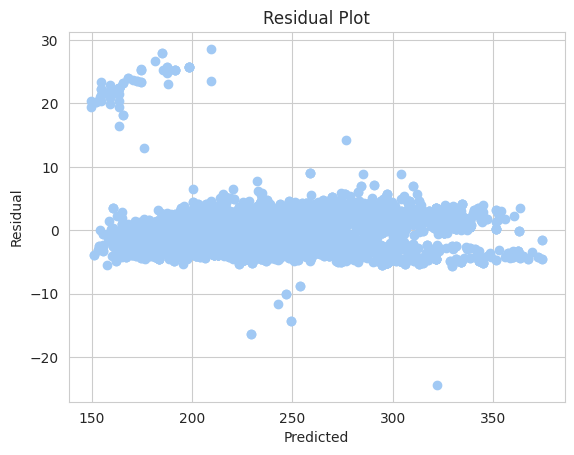

Mean of Residuals:  -0.0019128529079469568


0.9999974336443339

In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Print R-squared and MSE
print("R-squared: ", results_wls.rsquared)
print("MSE: ", mean_squared_error(df_2['CO2 Emissions (g/km)'], results_wls.predict()))

# Plot residuals
plt.scatter(results_wls.predict(), results_wls.resid)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

# Print mean of residuals
print("Mean of Residuals: ", np.mean(results_wls.resid))
adjusted_r_squared = 1 - (1-results_wls.rsquared)*(len(df_2['CO2 Emissions (g/km)'])-1)/(len(df_2['CO2 Emissions (g/km)'])-X.shape[1]-1)
adjusted_r_squared



In [ ]:
df_2.shape

(5541, 12)

####adjusted R2 score, assujmptions satisfied

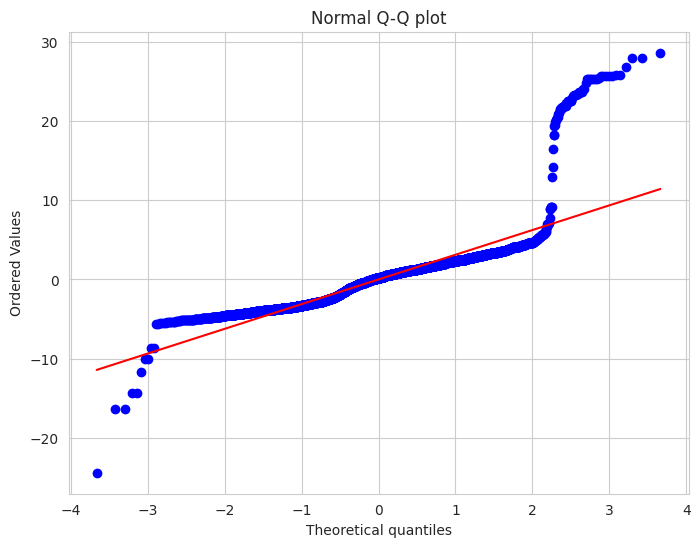

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Calculate residuals
residuals = results_wls.resid

# Create QQ plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()


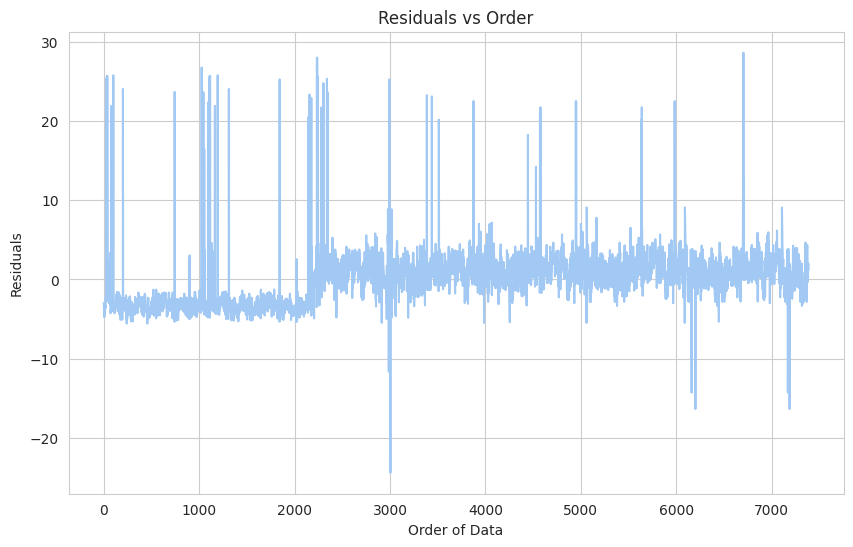

In [ ]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = results_wls.resid

# Create residuals vs order plot
plt.figure(figsize=(10,6))
plt.plot(residuals)
plt.xlabel('Order of Data')
plt.ylabel('Residuals')
plt.title('Residuals vs Order')
plt.show()


In [ ]:
unique_fuel_types = df_2['Fuel Type'].unique()

for index, fuel_type in enumerate(unique_fuel_types, start=1):
    print(f"{index}. {fuel_type}")


1. Z
2. D
3. X


In [ ]:
unique_transmission_gears = df_2['Transmission'].unique()

for index, transmission_gear in enumerate(unique_transmission_gears, start=1):
    print(f"{index}. {transmission_gear}")


1. AS5
2. M6
3. AS6
4. AM6
5. A6
6. AV8
7. AS8
8. A7
9. A8
10. AM7
11. M5
12. AV
13. A4
14. A5
15. AV7
16. AS7
17. A9
18. AS9
19. AV6
20. M7
21. AS4
22. AM5
23. AM8
24. AM9
25. AS10
26. A10


In [ ]:
category_map = {'A10' : 'A',
                'A4' : 'A',
                'A5': 'A',
                'A6': 'A',
                'A7': 'A',
                'A8': 'A',
                'A9': 'A',
                'AM5':'AM',
                'AM6':'AM',
                'AM7':'AM',
                'AM8':'AM',
                'AM9':'AM',
                'AS10':'AS',
                'AS4':'AS',
                'AS5':'AS',
                'AS6':'AS',
                'AS7':'AS',
                'AS8':'AS',
                'AS9':'AS',
                'AV' :'AV',
                'AV10':'AV',
                'AV6':'AV',
                'AV7':'AV',
                'AV8':'AV',
                'M5':'M',
                'M6':'M',
                'M7':'M'}
df_2['Transmission'] = df_2['Transmission'].replace(category_map)

In [ ]:
unique_fuel_types = df_2['Fuel Type'].unique()

for index, fuel_type in enumerate(unique_fuel_types, start=1):
    print(f"{index}. {fuel_type}")


1. Z
2. D
3. X


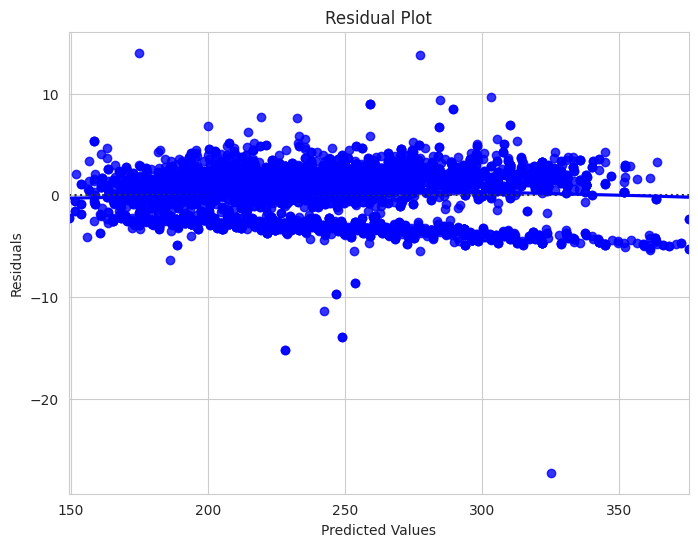

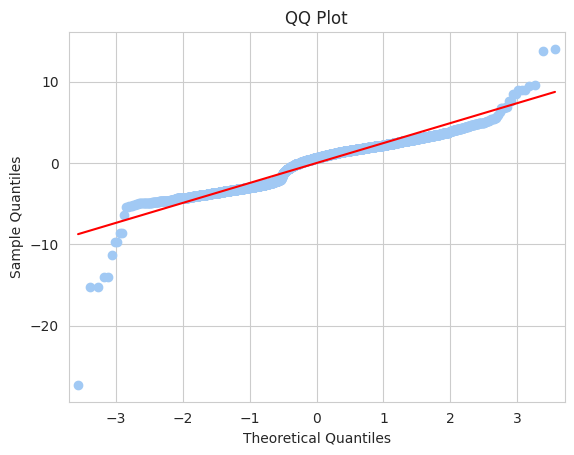

R-squared (R2) Score: 0.9969786632214608
Mean Squared Error (MSE): 6.019912432705905


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as OLSInfluence
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'df_2' with the necessary columns

# Create dummy variables for 'Transmission' and 'Fuel Type'
df_2 = pd.get_dummies(df_2, columns=['Transmission', 'Fuel Type'], prefix=['Trans', 'Fuel'])

# Define the independent variables (X) and the dependent variable (y)
X = df_2[['Engine Size (L)', 'Fuel Consumption Comb (L/100 km)', 'Trans_AS', 'Trans_M', 'Trans_AM', 'Trans_A', 'Trans_AV',
         'Fuel_Z',  'Fuel_X']]
X = sm.add_constant(X)  # Add a constant for the intercept
y = df_2['CO2 Emissions (g/km)']

# Fit the MLR model
model = sm.OLS(y, X).fit()

# Make predictions
y_pred = model.predict(X)

# Calculate R-squared (R2) score
r2 = r2_score(y, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Residual Plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=model.resid, lowess=True, color="b")
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# QQ Plot
residuals = model.resid
sm.qqplot(residuals, line='s')
plt.title("QQ Plot")
plt.show()

# Print results
print("R-squared (R2) Score:", r2)
print("Mean Squared Error (MSE):", mse)
